# <font color=black> **Problem Introduction:**

**Introduction:** Dataset at hand is from Credence Housing Finance Ltd which deals in all home loans. They have presence across all urban, semi urban and rural areas. 



**Loan Process**: Customer first applies for home loan, after that the company validates the customer eligibility for loan.



CEO Mr. Dubey hires you as a statistical analyst who wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. He wants you to present a detail EDA on the
available data to identify potential factors.



**Details**: Gender, Marital Status, Education, Number of Dependents, Income, Loan
Amount, Credit History and others. 



# <font color=black> **Problem Statement:**


1. Identify the variable types based on the data in them and describe them using
appropriate central tendency measures (5)
2. Discuss few measures of spread for continuous variables (5)

3. Perform a Univariate analysis on applicant income and loan amount. (Use both
numerical and graphical representations) (10)
4. Research various methods of missing value treatments. Perform missing value
treatment on loan amount and marital status (10)


5. Research various methods of outlier treatments. Perform outlier treatment on
applicant’s income and co-applicant’s income (10)
6. Generate histograms for applicant’s income and loan amount for each of education type.
Plot the histograms on same graph and specify the type of distribution they follow. (10)

7. Answer these hypotheses with appropriate visualizations and tests (8 x 5 = 40)

  [Hint: For cont. vs cat relationship – use t-test/ANOVA; For cat vs cat   relationship – use
chi-sq]

  a. Are males having a higher loan approval status?

  b. Are graduates earning more income than non-graduates?

  c. Are self-employed applying for higher loan amount than employed?

  d. Is there a relationship between self-employment and education status?

  e. Is urbanicity of loan property related to loan approval status?

  f. How is applicant’s income related to the loan amount that they get?

  g. How helpful is previous credit history in determining the loan approval?

  h. Are people with more dependents reliable for giving loans?

8. Explore the data further (only tables and visualizations) and identify any interesting
relationship among attributes (5)
9. Summarize the key findings and write a 5-10 line short executive summary to Mr.
Dubey (10)

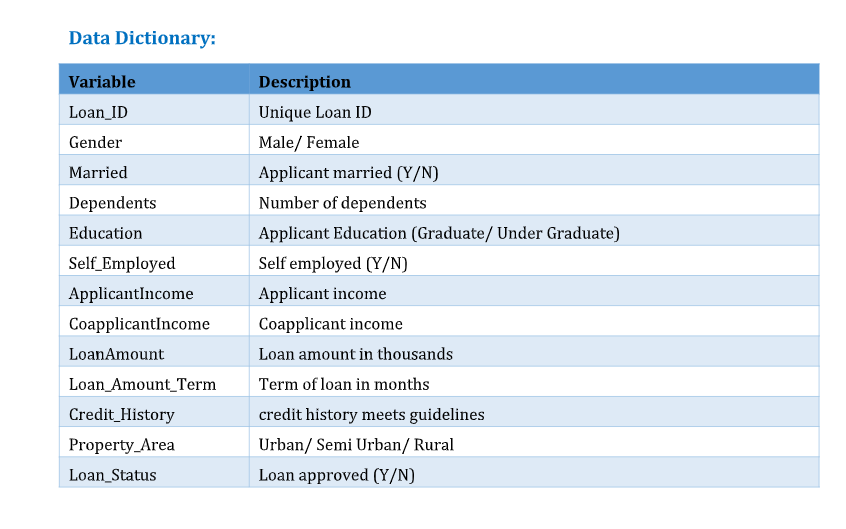

**Brief description of the Dataset:**
The dataset consists of 400+ unique Loan records and related information combined to form a Dataset which can be used to train a machine learning model .It has 13 variables, 12 independent and one dependent variable(Loan_Status).



#  Bank Loan Approval EDA Project
### Author: *Dhrithi Ashok*
### Tools Used: Python, Pandas, Matplotlib, Seaborn, Missingno, NumPy

###  Objective
The goal of this project is to explore bank loan data and identify key patterns that influence loan approvals.  
This Exploratory Data Analysis (EDA) aims to answer *which applicant characteristics lead to a higher probability of loan approval*.


###  Project Review
This project focuses purely on **Exploratory Data Analysis (EDA)** of bank loan approval data.  
The dataset contains information about applicants’ demographics, income, loan amount, and credit history.  
The main purpose of this analysis is to:
- Understand data distribution and relationships among features  
- Handle missing values and outliers effectively  
- Visualize trends influencing loan approval decisions  
- Derive business insights that could guide future loan policies  

Unlike a machine learning project, this EDA emphasizes **data understanding and storytelling** rather than prediction.


### Tools & Libraries Used
- Python  
- Pandas  
- NumPy  
- Matplotlib  
- Seaborn  
- Missingno  
- SciPy  

These tools were used for data wrangling, visualization, and exploratory analysis.


# <font color=black> **Importing the required Python libraries**

In [1]:
!pip install missingno

In [2]:
import numpy as np #linear algebra
import pandas as pd #data preprocessing, csv file
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import scipy.stats as stats

In [3]:
# from numpy.random import seed
# from numpy.random import randn
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [4]:
import seaborn as sns
import matplotlib.ticker as mtick #fpr specifying the axis tick formats
import missingno
import matplotlib.patches as patches

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [6]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error

# <font color=black>User Defined Functions

In [7]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [8]:
#Function to get valucounts, null values and uniques values from a column
def UNIQUE_NULL_value_counts(df_name,Field_name, value_counts_needed):
  print("###########################"+color.BOLD,Field_name,color.END+"######################################################" + color.END)
  print("Number of unique values in "+Field_name+": ",df_name[Field_name].nunique())
  print("\n")
  print("Number of null values in "+Field_name+": ",df_name[Field_name].isnull().sum())
  print("\n")
  if df_name.dtypes[Field_name]== "O":
    print("Description of the column \n"+Field_name+": ",df_name[Field_name].describe(include=object).T)
    print("\n")
    print("Since, this is categorical, it has no mean and median")
    print("Mode : ",df_name[Field_name].mode()[:1][0])
    print("\n")
  else:
    print("Description of the column \n"+Field_name+": ",df_name[Field_name].describe().T)
    print("\n")
    print("Mean : ",df_name[Field_name].mean())
    print("\n")
    print("Median : ",df_name[Field_name].median())
    print("\n")
    print("Mode : ",df_name[Field_name].mode()[:1][0])
  print("\n")
  
  if value_counts_needed:
    print("Value_counts of "+Field_name+": \n",df_name[Field_name].value_counts())
  print("\n")

In [9]:
def measure_of_spread(dataset,col):
  print("Measure of Spread for ",col,": ")
  print("\nRange:                       %.3f" % (dataset[col].max() - dataset[col].min()))
  # calculate quartiles
  quartiles = np.percentile(dataset[col], [25, 50, 75])
  # calculate min/max
  data_min, data_max = dataset[col].min(), dataset[col].max()
  # print 5-number summary
  print("\nQuartile Summary")
  print('Min:                          %.3f' % data_min)
  print('Q1:                           %.3f' % quartiles[0])
  print('Median:                       %.3f' % quartiles[1])
  print('Q3:                           %.3f' % quartiles[2])
  print('Max:                          %.3f' % data_max)
  print("IQR:                          %.3f" % (quartiles[2] - quartiles[0]) )
  print("\nVariance:                   %.3f" % dataset[col].var())
  print("\nStandard Deviation:         %.3f" % dataset[col].std())


##  Loading the Dataset
We'll load the dataset and take a quick look at its structure.

In [10]:
#Code to load dataset
df= pd.read_csv("C:/Users/Dhrithi K.A/Desktop/Loan_Prediction/loan_approval_dataset (1).csv")

##  Data Quality Report
Before diving into the analysis, let’s understand the structure and quality of our data — including missing values, data types, and uniqueness of columns.

In [11]:
data_summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
data_summary

,Data Type,Missing Values,Unique Values
Loan_ID,object,0,614
Gender,object,13,2
Married,object,3,2
Dependents,object,15,4
Education,object,0,2
Self_Employed,object,32,2
ApplicantIncome,int64,0,505
CoapplicantIncome,float64,0,287
LoanAmount,float64,22,203
Loan_Amount_Term,float64,14,10


In [12]:
df.shape #Number of rows, Number of columns

(614, 13)

In [13]:
df.info() #Info about datatypes and null values of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.duplicated().sum() #Finding if there are any duplicated rows
#data.duplicated(subset=None, keep='first').sum() 

np.int64(0)

In [15]:
UNIQUE_NULL_value_counts(df,'Loan_ID',False) #Finding number of unique  and null values in loan_id column

########################### Loan_ID ######################################################
Number of unique values in Loan_ID:  614


Number of null values in Loan_ID:  0


Description of the column 
Loan_ID:  count          614
unique         614
top       LP002990
freq             1
Name: Loan_ID, dtype: object


Since, this is categorical, it has no mean and median
Mode :  LP001002








In [16]:
df.iloc[:,1:].duplicated(subset=None, keep='first').sum() #Finding if there are any rows with similar loan info and different loan id's

np.int64(0)

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.describe().T # Statistics on Quantitative data

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [19]:
df.describe(include=object).T # Statistics on Categorical data

,count,unique,top,freq
Loan_ID,614,614,LP002990,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


# <font color=black>1. Identify the variable types based on the data in them and describe them using appropriate central tendency measures (5)

Central tendency measures are summary measures that attempts to describe the dataset at hand, with a single value that represents the middle or centre of its distribution.
There are 3 main central tendency measures:
1. Mean  - Mean is the sum of the values of each observation in a dataset divided by the number of observations.

  Advantage of the mean:

  1.The mean can be used for both continuous and discrete numeric data.

  Limitations of the mean:
  
  1.The mean cannot be calculated for categorical data, as the values cannot be
summed.

  2.As the mean includes every value in the distribution the mean is influenced by outliers and skewed distributions.


2. Median -  Median is the middle value in the distribution when it is arranged in ascending or descending order.

  Advantage of the median:

  1.The median is less affected by outliers and skewed data than the mean, and is  usually the preferred measure of central tendency when the distribution is not symmetrical.

  Limitation of the median:

  1.The median cannot be identified for categorical nominal data, as it cannot be logically ordered.


3. Mode - The mode is the most commonly occurring value in a distribution.
  Advantage of the mode:

  1.The mode has an advantage over the median and the mean as it can be found for both numerical and categorical (non-numerical) data.

   Limitations of the mode:

  1.The are some limitations to using the mode. In some distributions, the mode may not reflect the centre of the distribution very well. When the distribution of retirement age is ordered from lowest to highest value, it is easy to see that the centre of the distribution is 57 years, but the mode is lower, at 54 years.

In [20]:
#Indentifying variable types:
df.info() # Datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the data dictionary, it is eveident that the dataset has 4 quantitative variables and 9 categorical/ordinala/Nominal variables.

Lets break down the data. Since Load ID is unique for all the reords, lets drop it

In [21]:
df = df.drop(axis=1,columns=['Loan_ID'])

Since credit history has only 2 values, let convert it to catgeorical variable.

In [22]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [23]:
convert_dict = {'Credit_History': str} 
df = df.astype(convert_dict) 
print(df.dtypes) 

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object


In [24]:
quant_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

categorical_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']

In [25]:
for i in quant_var:  #Finding value counts, null values, mean values  and datatypes of all the quantitative columns in the dataset.
  UNIQUE_NULL_value_counts(df,i,True) 

########################### ApplicantIncome ######################################################
Number of unique values in ApplicantIncome:  505


Number of null values in ApplicantIncome:  0


Description of the column 
ApplicantIncome:  count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


Mean :  5403.459283387622


Median :  3812.5


Mode :  2500


Value_counts of ApplicantIncome: 
 ApplicantIncome
2500     9
4583     6
6000     6
2600     6
3750     5
        ..
7660     1
5955     1
3365     1
2799     1
12841    1
Name: count, Length: 505, dtype: int64


########################### CoapplicantIncome ######################################################
Number of unique values in CoapplicantIncome:  287


Number of null values in CoapplicantIncome:  0


Description of the column 
CoapplicantIncome:  count      614.00

In [26]:
for i in categorical_var:  #Finding value counts, null values, mode values  and datatypes of all the categorical columns in the dataset.
  UNIQUE_NULL_value_counts(df,i,True) 

########################### Gender ######################################################
Number of unique values in Gender:  2


Number of null values in Gender:  13


Description of the column 
Gender:  count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object


Since, this is categorical, it has no mean and median
Mode :  Male




Value_counts of Gender: 
 Gender
Male      489
Female    112
Name: count, dtype: int64


########################### Married ######################################################
Number of unique values in Married:  2


Number of null values in Married:  3


Description of the column 
Married:  count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object


Since, this is categorical, it has no mean and median
Mode :  Yes




Value_counts of Married: 
 Married
Yes    398
No     213
Name: count, dtype: int64


########################### Dependents ######################################################
N

Credit history has nan values, lets make them numpy.Nan 


In [358]:
df["Credit_History"]= np.where(df['Credit_History'] == 'nan', np.nan, df["Credit_History"])

In [359]:
df.describe().T # Statistics on Quantitative data

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,548.0,4128.978102,1907.396960,150.000000,2768.750000,3656.000000,5000.000000,10139.000000
CoapplicantIncome,548.0,1359.425036,1458.228533,0.000000,0.000000,1293.500000,2250.000000,5701.000000
LoanAmount,548.0,130.638623,51.664095,9.000000,100.000000,124.000000,155.000000,376.000000
Loan_Amount_Term,534.0,342.584270,65.521343,12.000000,360.000000,360.000000,360.000000,480.000000
TotalIncome,548.0,5488.403139,2129.222310,1442.000000,3929.750000,5051.000000,6528.750000,13746.000000
Loan_Income_Ratio,528.0,0.024682,0.007712,0.003785,0.020361,0.024696,0.028546,0.082712
Scaled_CoapplicantIncome,548.0,0.238454,0.255785,0.000000,0.000000,0.226890,0.394668,1.000000


In [361]:
df.describe(include=object).T # Statistics on Categorical data

,count,unique,top,freq
Gender,538,2,Male,437
Married,548,2,Yes,356
Dependents,534,4,0,314
Education,548,2,Graduate,417
Self_Employed,519,2,No,455
Credit_History,503,2,1.0,424
Property_Area,548,3,Semiurban,209
Loan_Status,548,2,Y,380


Lets look at each quant variable seperately to decide which central tendency measure best describes it.

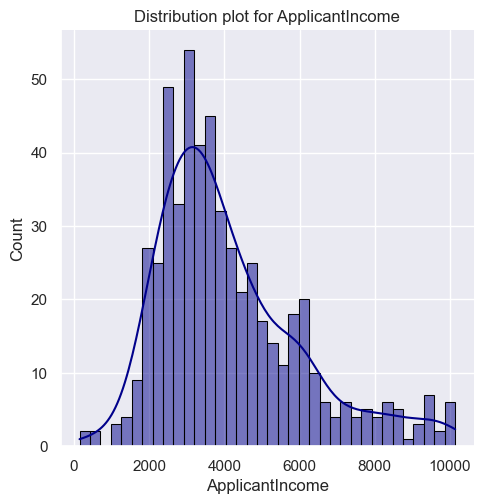

In [362]:
sns.displot(df['ApplicantIncome'], kind='hist', kde=True, 
             bins=int(180/5), color = 'darkblue', 
             edgecolor='black')
plt.title("Distribution plot for ApplicantIncome")
plt.show()

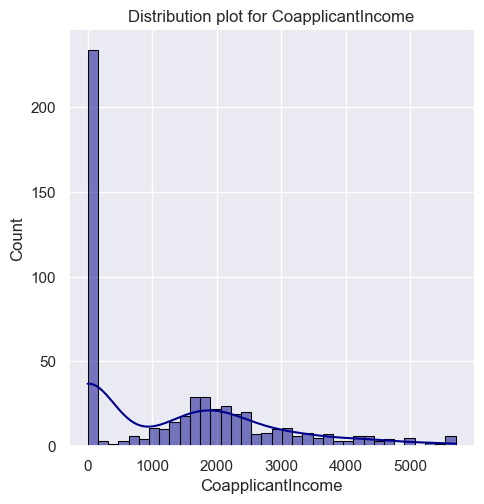

In [363]:
sns.displot(df['CoapplicantIncome'], kind = 'hist', kde=True, 
             bins=int(180/5), color = 'darkblue', 
             edgecolor ='black')
plt.title("Distribution plot for CoapplicantIncome")
plt.show()

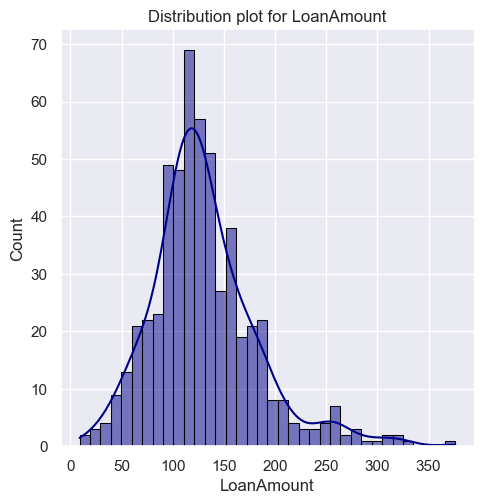

In [364]:
sns.displot(df['LoanAmount'], kind = 'hist', kde=True, 
             bins=int(180/5), color = 'darkblue', 
             edgecolor ='black')
plt.title("Distribution plot for LoanAmount")
plt.show()

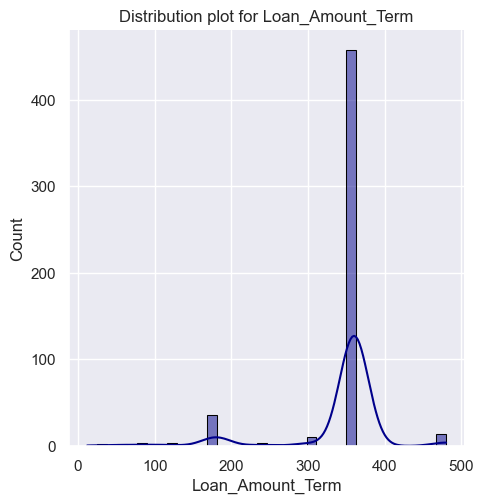

In [367]:
sns.displot(df['Loan_Amount_Term'], kind='hist', kde=True, 
             bins=int(180/5), color = 'darkblue', 
             edgecolor ='black')
plt.title("Distribution plot for Loan_Amount_Term")
plt.show()

**Central tendency tells you about the centers of the data. Useful measures include the mean, median, and mode.**



In [368]:
print("\n----------- Mean Values -----------\n") #Mean values for quantitavitve variable
print(df.mean(numeric_only=True))
#If you have outlier values in your dataset, you shouldn’t prefer mean for measure central tendency. We prefer using mean for normal distribution.


----------- Mean Values -----------

ApplicantIncome             4128.978102
CoapplicantIncome           1359.425036
LoanAmount                   130.638623
Loan_Amount_Term             342.584270
TotalIncome                 5488.403139
Loan_Income_Ratio              0.024682
Scaled_CoapplicantIncome       0.238454
dtype: float64


In [369]:
print("\n----------- Calculate Median -----------\n")
print(df.median(numeric_only=True)) 


----------- Calculate Median -----------

ApplicantIncome             3656.000000
CoapplicantIncome           1293.500000
LoanAmount                   124.000000
Loan_Amount_Term             360.000000
TotalIncome                 5051.000000
Loan_Income_Ratio              0.024696
Scaled_CoapplicantIncome       0.226890
dtype: float64


In [370]:
#Mode values for all the 12 columns except for loan_id which is a uniqueid
print("\n----------- Calculate Mode -----------\n")
for i in['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']:
  print(i,":  " ,df[i].mode()[:1][0])
#df[‘column_name’].mode()


----------- Calculate Mode -----------

Gender :   Male
Married :   Yes
Dependents :   0
Education :   Graduate
Self_Employed :   No
ApplicantIncome :   2500
CoapplicantIncome :   0.0
LoanAmount :   120.0
Loan_Amount_Term :   360.0
Credit_History :   1.0
Property_Area :   Semiurban
Loan_Status :   Y


**Central tendency measure used to describe each variable:**


*   Gender - This column has 2 unique values, Male and Female (Categorical nominal variable) and has 13 rows with null value for Gender column. Mode should be the preffered central tendency measure.

*   Married- This has 2 unique values, YES and No (Categorical nominal variable). This column has 3 rows with null values. Mode should be the preffered central tendency measure.

*   Dependents- This column has 4 unique values, since anything greater than 3 is recorded as 3+, this variable can be considered ordinal datatype. It has 15 rows with null values. It is ordinal(with and thing greater than 3 cnsidered highest). Mode should be the preffered central tendency measure.

*   Education- This has 2 unique values(Categorical nominal variable) and no null values. Mode should be the preffered central tendency measure.

*   Self_Employed-  This has 2 unique values, YES and No(Categorical nominal variable). This column has 32 rows with null values. Mode should be the preffered central tendency measure.

*   ApplicantIncome- This is the applicant Income. It has no null values and is a continous variable. All the applicants have income > 0. The data is right skewed. Hence, median will be the preferred central tendency measure.

*   CoapplicantIncome- This is the co applicant income, It has No null values and has 273 rows with income= 0. The data is right skewed. Hence, median will be the preferred central tendency measure.

*   LoanAmount- This is the loan amount, It has 14 null values and all the other loan values are > 0. The data is slightly right skewed but almost normally distributed. Hence, mean will be the preferred central tendency measure.

*   Loan_Amount_Term- This is the loan amount term in number of months, this is a continous variable and has 14 null values, with values always greater than 0 months. This does not follow normal distribution. Median would be a better central tendency measure for this variable.

*   Credit_History- This is the credit history of the applicant, this has 2 values 1 and 0, it has to be categorical ordinal variable, with 1 has good credit hostory, 0 has worst credit history and has 50 null values. In case of ordinal data, we can use either median or mode. Since this column has both median and mode as 1, we can use both the central tendency measures t describe the data.

*   Property_Area- TThis variable has no null values and has 3 unique values(Sem-Urban, urban and rural). This is categorical nominal variable. Mode would better describe the variable.

*   Loan_Status- This is the dependent variable, which is categorical nominal variable and has 2 unique values y and n and has no null values. Mode would better describe the variable.

#<font color=black> 2. Discuss few measures of spread for continuous variables (5)

Measure of spread is generally used to describe the variability in a sample or population. It is used with central tendency measures to provide an overall description of a set of data. Below are some of the measures of spread of continous data.

**Range**  - Difference between highest and lowest values of  column in a dataset.

**Quartiles** - Quartiles give the range of data by breaking the sets into quarters. Quartiles are much less affected by outliers or skewed dataset compared to mean and standard deviation.

Q1 = 1st Quartile = 25th Percentile, that is the lowest 25% of numbers.

Q2 = 2nd Quartile= 50th Percentile, that is the next lowest 25% of numbers (up to the median).

Q3= 3rd Quartile = The second highest 25% of numbers (above the median).

Q4 = 4th Quartile, that is the highest 25% of numbers.


**Inter Quartile Range** -  IQR measures the variability of a distribution by giving us the range covered by the MIDDLE 50% of the data. 

IQR = Q3 – Q1

If a data point is below (Q1 – 1.5 × IQR) or above (Q3 + 1.5 × IQR), it is viewed as being too far from the central values to be reasonable.

**Variation (Absolute deviation, Mean absolute deviation, Variance and Standard deviation)** -  Above mentioned measures gives a more representative idea of  a dataset compared to Quartiles, as they consider actual values in the dataset directly.
Deviation of a score from the mean is calcuated by subtracting the mean score from each value. Absolute deviation, we add up all the modular values of the differences calculated as mentioned above. Mean of these differences gives us Mean absolute deviation.  
Another was is to add up the squared difference and find the mean squared difference. This is called Variance and square root of the Variance gives us standard deviation . Standard deviation is a measure of how spread out data is around the mean.

The standard deviation is used with the mean to summarise continuous data, not categorical data. The standard deviation is appropriate when the continuous data is not significantly skewed or has outliers, like mean.

Since there are 4 continous values in the dataset, lets look at the measure of spread for these values

In [371]:
measure_of_spread(df,'ApplicantIncome')

Measure of Spread for  ApplicantIncome : 

Range:                       9989.000

Quartile Summary
Min:                          150.000
Q1:                           2768.750
Median:                       3656.000
Q3:                           5000.000
Max:                          10139.000
IQR:                          2231.250

Variance:                   3638163.162

Standard Deviation:         1907.397


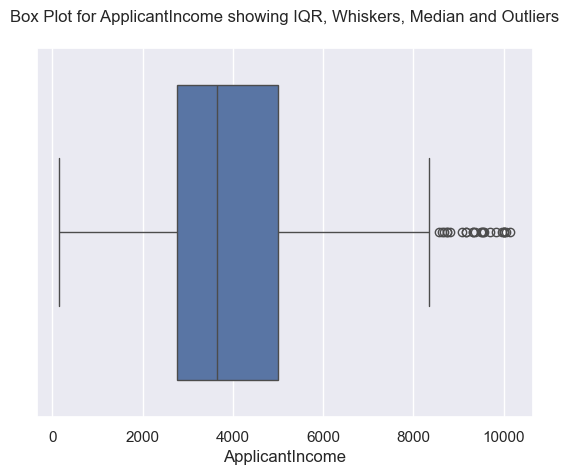

In [372]:
sns.boxplot(x="ApplicantIncome", data=df)
plt.title("Box Plot for ApplicantIncome showing IQR, Whiskers, Median and Outliers\n ")
plt.show()

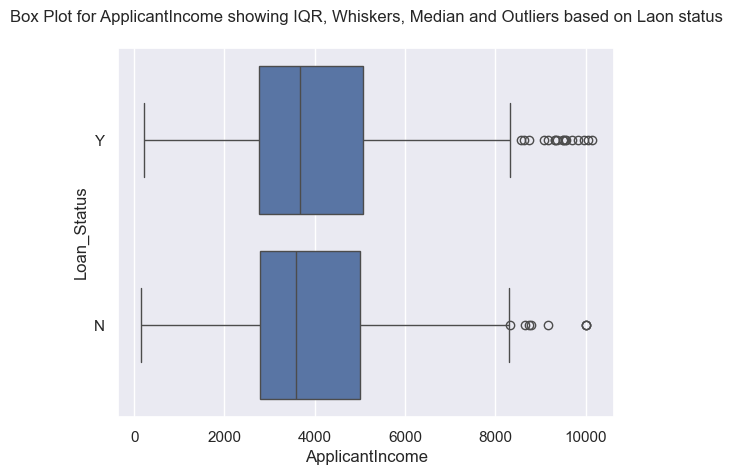

In [373]:
sns.boxplot(x="ApplicantIncome", y="Loan_Status", data=df)
plt.title("Box Plot for ApplicantIncome showing IQR, Whiskers, Median and Outliers based on Laon status\n ")
plt.show()

The above data shows that the ApplicantIncome has many outliers and it seems to be slightly righ skewed, but I think this is acceptable as income  group varies and the data seems to be valid.
One work around is to conver the income into categories before applying to model, if there seems to be realtionship between applicant income and Loan status.

In [374]:
measure_of_spread(df,'CoapplicantIncome')
#'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'

Measure of Spread for  CoapplicantIncome : 

Range:                       5701.000

Quartile Summary
Min:                          0.000
Q1:                           0.000
Median:                       1293.500
Q3:                           2250.000
Max:                          5701.000
IQR:                          2250.000

Variance:                   2126430.455

Standard Deviation:         1458.229


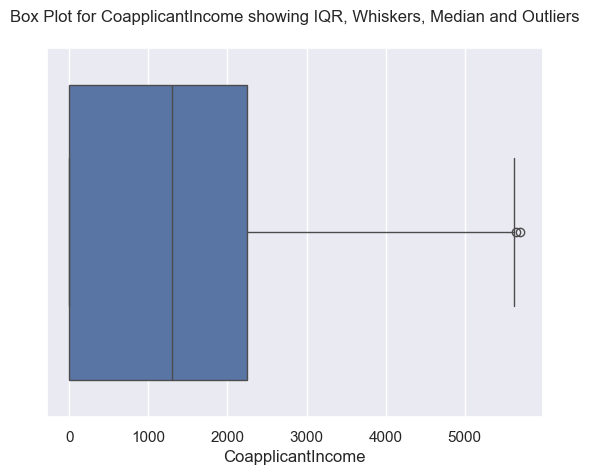

In [375]:
sns.boxplot(x="CoapplicantIncome", data=df)
plt.title("Box Plot for CoapplicantIncome showing IQR, Whiskers, Median and Outliers\n ")
plt.show()

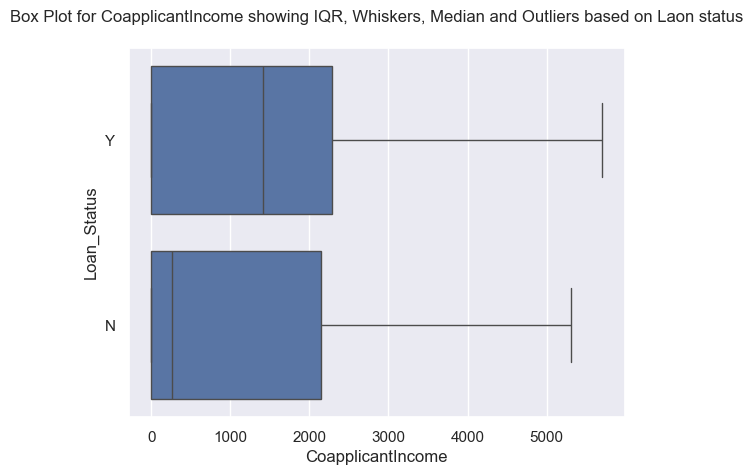

In [376]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df)
plt.title("Box Plot for CoapplicantIncome showing IQR, Whiskers, Median and Outliers based on Laon status\n ")
plt.show()

The above data shows that the Co-ApplicantIncome has many outliers and it seems to be slightly righ skewed, but I think this is acceptable as income  group varies and the data seems to be valid.
But the interesting aspect is, distribution changed a lot for co applicant income for people who had their loans approved to those that had their applications denied.

In [377]:
measure_of_spread(df,'LoanAmount')

Measure of Spread for  LoanAmount : 

Range:                       367.000

Quartile Summary
Min:                          9.000
Q1:                           100.000
Median:                       124.000
Q3:                           155.000
Max:                          376.000
IQR:                          55.000

Variance:                   2669.179

Standard Deviation:         51.664


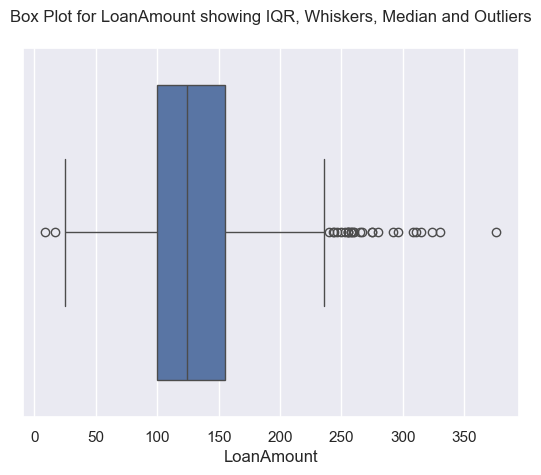

In [378]:
sns.boxplot(x="LoanAmount", data=df)
plt.title("Box Plot for LoanAmount showing IQR, Whiskers, Median and Outliers\n ")
plt.show()

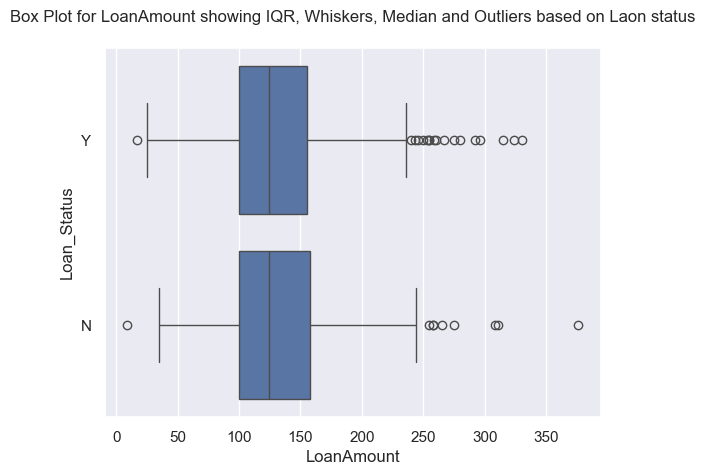

In [379]:
sns.boxplot(x="LoanAmount", y="Loan_Status", data=df)
plt.title("Box Plot for LoanAmount showing IQR, Whiskers, Median and Outliers based on Laon status\n ")
plt.show()

The above data shows that the LoanAmount has many outliers and it seems to be slightly righ skewed, but I think this is acceptable as loan amount varies as the type of loan(education, house, etc) is not mentioned.

In [380]:
measure_of_spread(df,'Loan_Amount_Term')

Measure of Spread for  Loan_Amount_Term : 

Range:                       468.000

Quartile Summary
Min:                          12.000
Q1:                           nan
Median:                       nan
Q3:                           nan
Max:                          480.000
IQR:                          nan

Variance:                   4293.046

Standard Deviation:         65.521


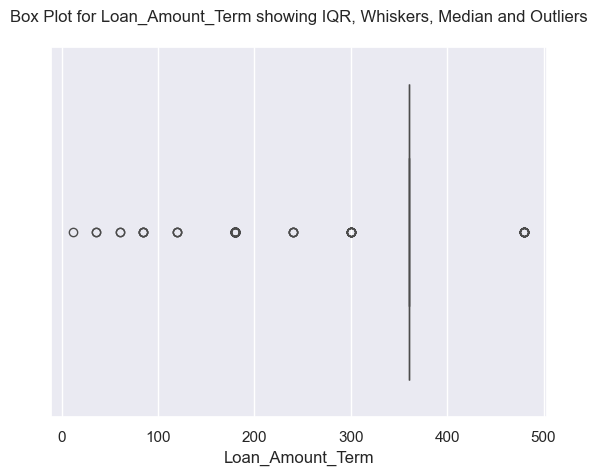

In [381]:
sns.boxplot(x="Loan_Amount_Term", data=df)
plt.title("Box Plot for Loan_Amount_Term showing IQR, Whiskers, Median and Outliers\n ")
plt.show()

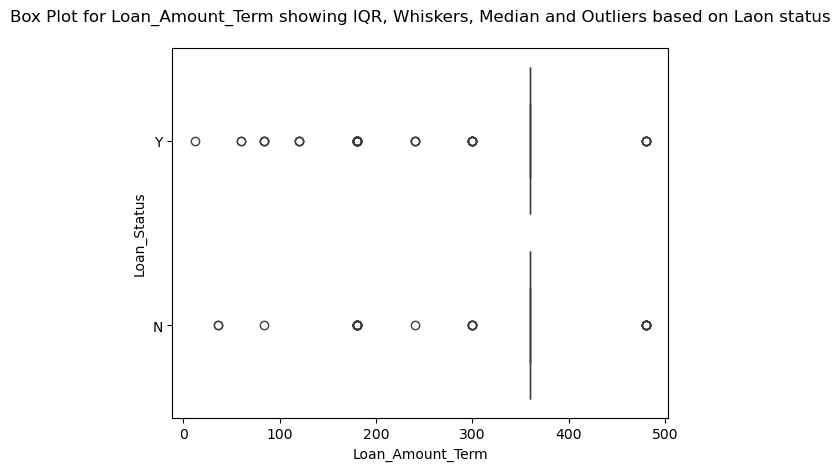

In [44]:
sns.boxplot(x="Loan_Amount_Term", y="Loan_Status", data=df)
plt.title("Box Plot for Loan_Amount_Term showing IQR, Whiskers, Median and Outliers based on Laon status\n ")
plt.show()

The above data shows that the Loan_Amount_Term has many outliers and it is not any where near normal distribution. But I think this is acceptable as Loan_Amount_Term  does not vary much and the data seems to be valid.


#<font color=black> 3. Perform a Univariate analysis on applicant income and loan amount. (Use both numerical and graphical representations) (10)

Univariate analysis is when you analyse a single variable.

## <font color=Blue>Applicant Income

In [382]:
df.ApplicantIncome.shape

(548,)

There are 614 records in total.

In [383]:
df.ApplicantIncome.nunique()
#data.LoanAmount.quantile([.25, .5, .75]) # Quantiles 

447

There are a total of 505 unique values out of 614 records

In [384]:
df.ApplicantIncome.isnull().sum()

np.int64(0)

There are no null values in the 614 records

In [385]:
print("Measure of Spread for ApplicantIncome \n")
print("Mean value of the data: ",df.ApplicantIncome.mean())
print("Median value of the data: ",df.ApplicantIncome.median())
print("Mode value of the data , Frequency: ",df.ApplicantIncome.mode())
print("\nRange:                       %.3f" % (df.ApplicantIncome.max() - df.ApplicantIncome.min()))
# calculate quartiles
quartiles = np.percentile(df.ApplicantIncome, [25, 50, 75])
data_min, data_max = df.ApplicantIncome.min(), df.ApplicantIncome.max()
print("\nQuartile Summary")
print('Min:                          %.3f' % data_min)
print('Q1:                           %.3f' % quartiles[0])
print('Median:                       %.3f' % quartiles[1])
print('Q3:                           %.3f' % quartiles[2])
print('Max:                          %.3f' % data_max)
print("IQR:                          %.3f" % (quartiles[2] - quartiles[0]) )
print("\nVariance:                   %.3f" % df.ApplicantIncome.var())
print("\nStandard Deviation:         %.3f" % df.ApplicantIncome.std())

Measure of Spread for ApplicantIncome 

Mean value of the data:  4128.978102189781
Median value of the data:  3656.0
Mode value of the data , Frequency:  0    2500
Name: ApplicantIncome, dtype: int64

Range:                       9989.000

Quartile Summary
Min:                          150.000
Q1:                           2768.750
Median:                       3656.000
Q3:                           5000.000
Max:                          10139.000
IQR:                          2231.250

Variance:                   3638163.162

Standard Deviation:         1907.397


* Since mean, median and mode are not equal, the data is not perfectly normally distributed. 

*  From the above Summary, it is clear that the mean of the applicant income is 
greater than median, hence the data is right skewed.

*  The Q3, third quartile is 5795, hence 75% of the data lies below 5795 and is close to mean. This clearly shows there are some outliers in the data and the data is Right skewed.

* Compared to the total range of the data, IQR is   very less (not proportionate), this tells that there are outliers in the data.






## Feature Engineering
To get deeper insights, I created a few new features that might better explain loan approval trends.


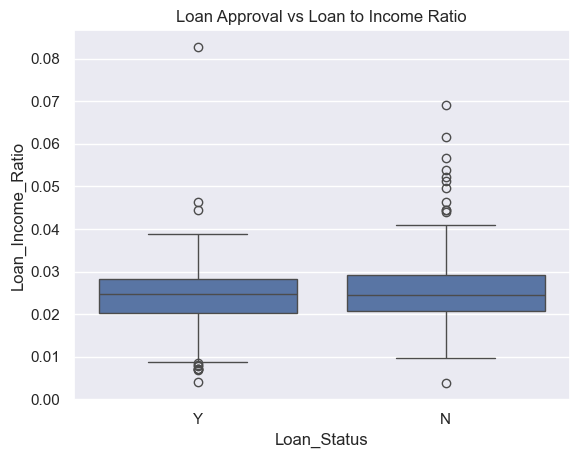

In [386]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['TotalIncome']

sns.boxplot(x='Loan_Status', y='Loan_Income_Ratio', data=df)
plt.title('Loan Approval vs Loan to Income Ratio')
plt.show()


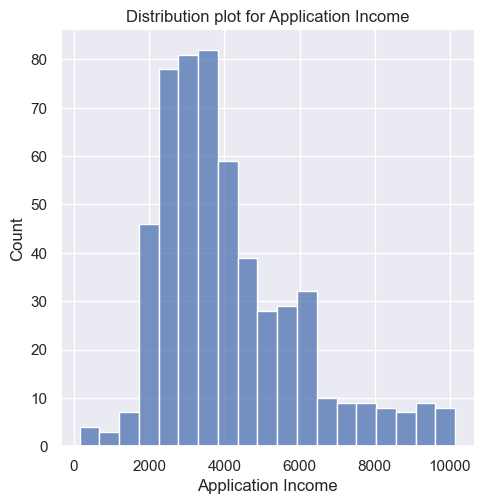

In [387]:
sns.displot(df.ApplicantIncome)
plt.title('Distribution plot for Application Income')
# Set x-axis label
plt.xlabel('Application Income')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

Almost normally distributed with right skewness, Hence median can be used as a mesaure of central tendency.

---



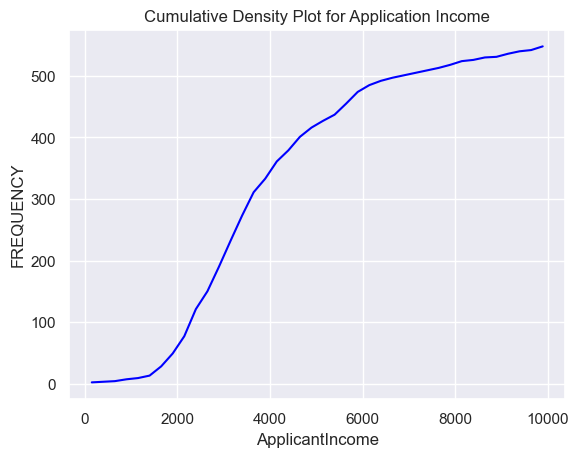

In [388]:

values, base = np.histogram(df.ApplicantIncome, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
plt.xlabel("ApplicantIncome")
plt.ylabel("FREQUENCY")
plt.title("Cumulative Density Plot for Application Income")
plt.show()

Almost most of the data has values less than 20000.

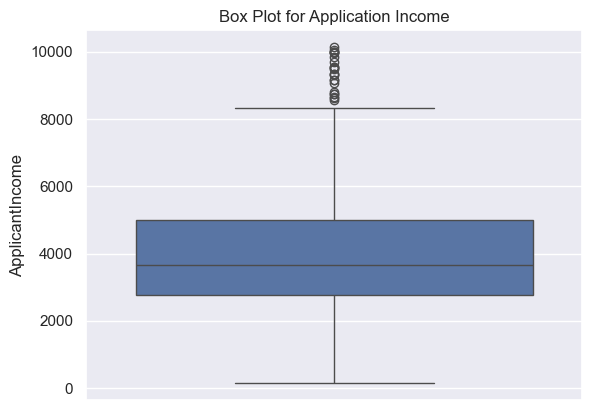

In [389]:
sns.boxplot(y='ApplicantIncome', data=df)
plt.title("Box Plot for Application Income")
plt.show()

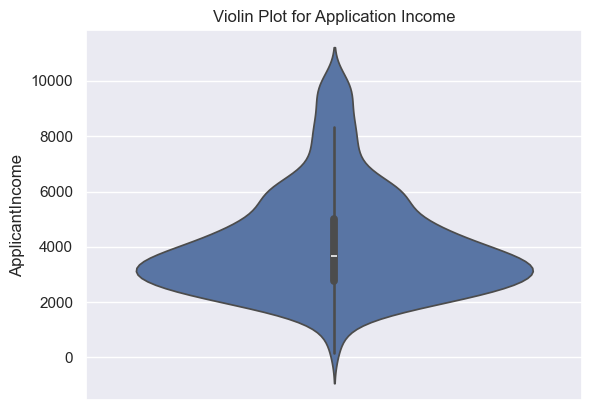

In [390]:
sns.violinplot(y='ApplicantIncome', data=df)
plt.title("Violin Plot for Application Income")
plt.show()

There are many outliers in the data and right skewed.

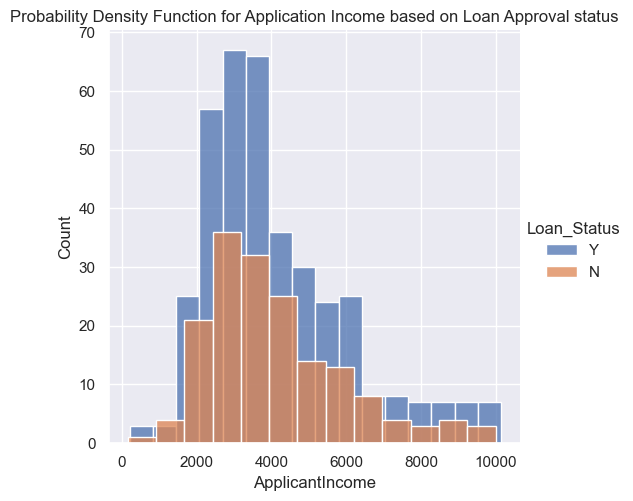

In [391]:
sns.FacetGrid(df,hue='Loan_Status',height=5).map(sns.histplot,'ApplicantIncome').add_legend()
plt.title("Probability Density Function for Application Income based on Loan Approval status")
plt.show()


There is high overlap in the loan approval status, this shows that there is no high variation in loan approval status due to applicant income alone

In [392]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome', data=df)
# sns.boxplot(x='surv_status',y='axil_nodes', data=haberman_data)
# sns.boxplot(x='surv_status',y='op_year', data=haberman_data)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

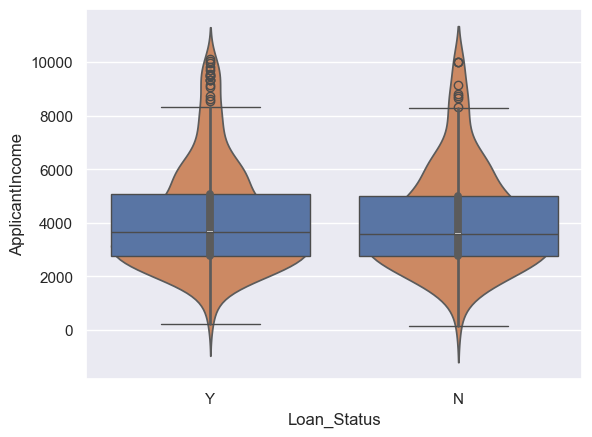

In [393]:
sns.violinplot(x='Loan_Status',y='ApplicantIncome', data=df)
plt.show()

The outliers in Applicant Income exists in both the categories based on Loan approval status. The extremities in outliers is greater in the category of applicant whose application got rejected.

Based on the Loan applicant status, the applicant income  seems to be almost the same for both categories.

## <font color=Blue>LoanAmount

In [394]:
df.LoanAmount.shape

(548,)

There are 614 records in total.

In [395]:
df.LoanAmount.nunique()
#data.LoanAmount.quantile([.25, .5, .75]) # Quantiles 

192

There are a total of 203 unique values out of 614 records

In [396]:
df.LoanAmount.isnull().sum()

np.int64(0)

There are 22 null values in the 614 records

In [397]:
print("Measure of Spread for LoanAmount \n")
print("Mean value of the data: ",df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.mean()) #Since Loan amount has null entries, we are exclusing rows with null values in the calaculations of measures
print("Median value of the data: ",df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.median())
print("Mode value of the data: ",df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.mode())
print("\nRange: %.3f" % (df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.max() - df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.min()))
# calculate quartiles
quartiles = np.percentile(df.dropna(axis=0, subset=['LoanAmount']).LoanAmount, [25, 50, 75])
# quantiles_1= data.ApplicantIncome.quantile([.25, .5, .75])
# print(quartiles,quantiles_1)
# calculate min/max
data_min, data_max = df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.min(), df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.max()
 # Quantiles 
# print 5-number summary
print("\nQuartile Summary")
print('Min:                          %.3f' % data_min)
print('Q1:                           %.3f' % quartiles[0])
print('Median:                       %.3f' % quartiles[1])
print('Q3:                           %.3f' % quartiles[2])
print('Max:                          %.3f' % data_max)
print("IQR:                          %.3f" % (quartiles[2] - quartiles[0]) )
print("\nVariance:                   %.3f" % df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.var())
print("\nStandard Deviation:         %.3f" % df.dropna(axis=0, subset=['LoanAmount']).LoanAmount.std())

Measure of Spread for LoanAmount 

Mean value of the data:  130.6386234881074
Median value of the data:  124.0
Mode value of the data:  0    120.0
Name: LoanAmount, dtype: float64

Range: 367.000

Quartile Summary
Min:                          9.000
Q1:                           100.000
Median:                       124.000
Q3:                           155.000
Max:                          376.000
IQR:                          55.000

Variance:                   2669.179

Standard Deviation:         51.664


* Since mean, median and mode are not equal, the data is not perfectly normally distributed. 

*  From the above Summary, it is clear that the mean of the applicant income is 
greater than median, hence the data is right skewed.

*  The Q3, third quartile is 164, hence 75% of the data lies below 164 and is close to mean. This clearly shows there are some outliers in the data and the data is Right skewed.

* Compared to the total range of the data, IQR is   very less (no proportionate), this tells that there are outliers in the data.






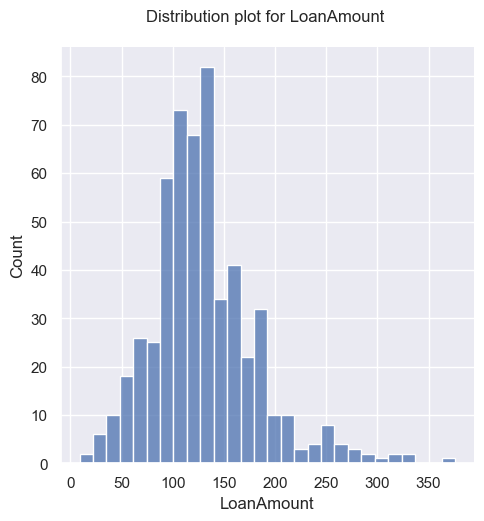

In [398]:
sns.displot(df.LoanAmount)
plt.title('Distribution plot for LoanAmount \n ')
# Set x-axis label
plt.xlabel('LoanAmount')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

Data is right skewed, Hence median can be used as a mesaure of central tendency.

---



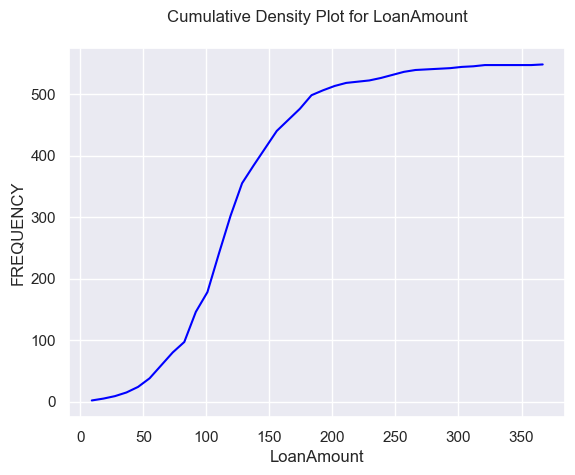

In [399]:

values, base = np.histogram(df.dropna(axis=0, subset=['LoanAmount']).LoanAmount, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
plt.xlabel("LoanAmount")
plt.ylabel("FREQUENCY")
plt.title("Cumulative Density Plot for LoanAmount\n")
plt.show()

Almost 90% of the data has values less than 400.

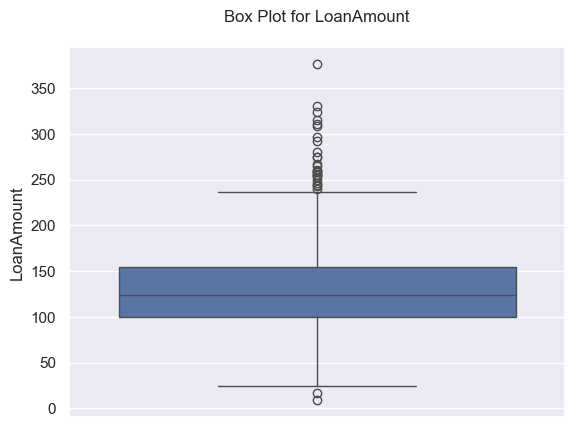

In [400]:
sns.boxplot(y='LoanAmount', data=df)
plt.title("Box Plot for LoanAmount\n")
plt.show()

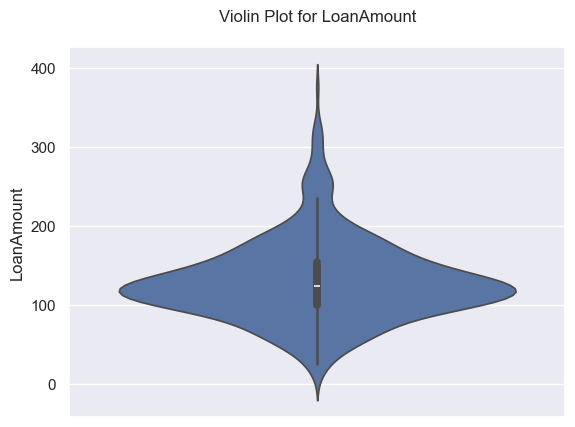

In [401]:
sns.violinplot(y='LoanAmount', data=df)
plt.title("Violin Plot for LoanAmount\n")
plt.show()

There are many outliers in the data.

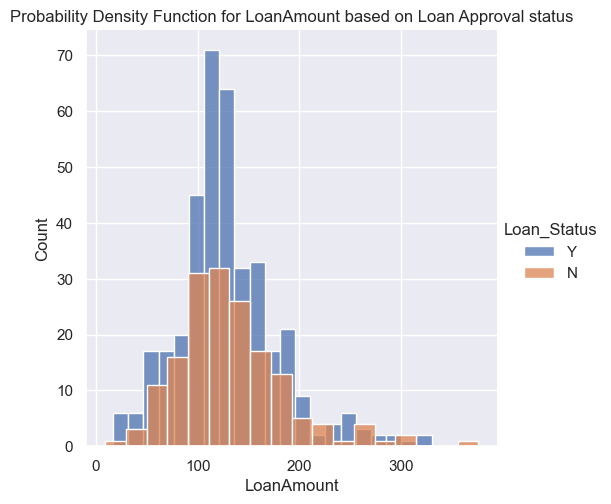

In [402]:
sns.FacetGrid(df,hue='Loan_Status',height=5).map(sns.histplot,'LoanAmount').add_legend()
plt.title("Probability Density Function for LoanAmount based on Loan Approval status")
plt.show()

There is high overlap in the loan approval status, this shows that there is no high variation in loan approval status due to Loan amount alone

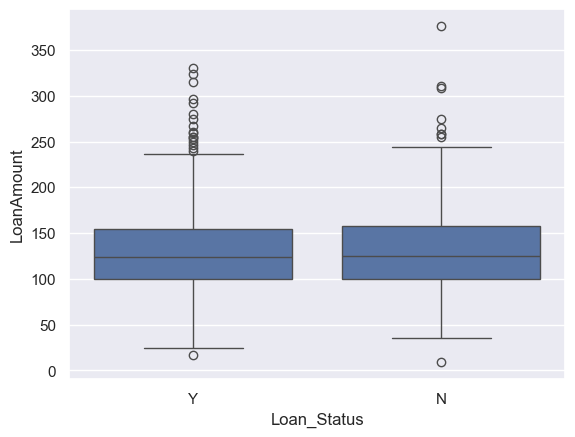

In [403]:
sns.boxplot(x='Loan_Status',y='LoanAmount', data=df)
# sns.boxplot(x='surv_status',y='axil_nodes', data=haberman_data)
# sns.boxplot(x='surv_status',y='op_year', data=haberman_data)
plt.show()

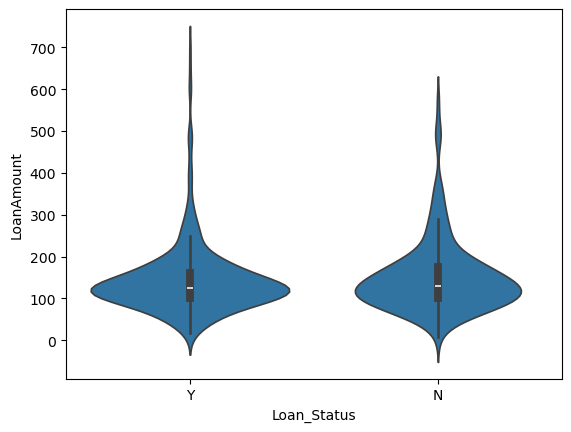

In [70]:
sns.violinplot(x='Loan_Status',y='LoanAmount', data=df)
plt.show()

The outliers in Applicant Income exists in both the categories based on Loan approval status.The extremities in outliers is greater in the category of applicant whose application got rejected. Median values of Loan amount for applicants whose loan status got rejected is slightly higher.

# <font color=black>4. Research various methods of missing value treatments. Perform missing value treatment on loan amount and marital status (10)

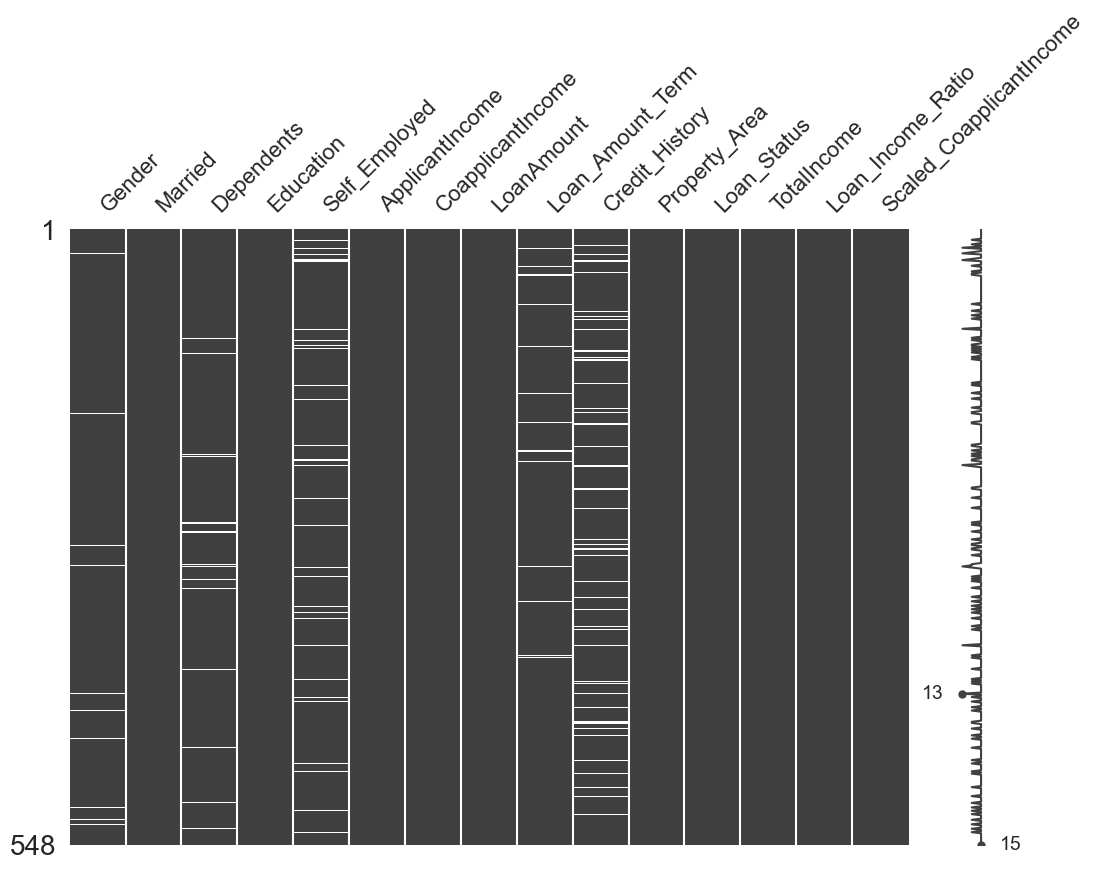

In [404]:
missingno.matrix(df,figsize=(12,8)) #Using this matrix we can very quickly find the pattern of missingness in the dataset
plt.show()

The above matrix shows the missing values(with horizontal white lines for each column) and it is clear that the data is missing randomly. The load_id, Education,applicant income, coapplicant income,property area and loan status have no missing values.

Apart from that Married(Marital status) column has very few missing values.

**There are many ways to impute missing values.**

1)  We can remove the values, if they are not having any domain significane and if they do not contribute much to the model. But in this case we will not remove both the variables.

2) Imputing Mean and Median: If the missing variable at hand is continous/Quantitative variable, we can replace it with mean, if the data is noramlly distributed, Else with median values. This may not be accurate, but depending on the use case we can consider this option. Works well with small numerical datasets but does not consider correlations and cannot be used for categorical variables


3) Imputation Using (Most Frequent): This method is generally used for Categorical data. It also doesn’t factor the correlations between features and may introduce bias in the variables.


4) Imputation Using k-NN: This is based on KNN algorithm and a value is assigned to a missing variable based on how closely it resembles the points in the training set. Can be more accurate that mean, median and mode imputation, but is expensive and does not account for outliers.

5) MICE (Multivariate imputation by chained equation): This is a complex technique, where the whole dataset is comsidered for multivariate imputation   and the data valuesa are imputed. This approcah is flexible and can handle any kind of data. If the dataset is very large, this may turn out to be computationally expensive. 

6) We can create a seperate model and populate the missing values, with the missing variable as the dependent variable.

7) Constant Value imputation: Choose a constant value based on domain  knowledge and impute it based. Ex, 0 if it has no value associated with respect to the variable at hand.

8) Random Imputation : Randomly choose a value and impute  it.

9) Another solution is to leave the missing values and use algorithms that are not affected by missing values like KNN.


## <font color=Blue>Loan Amount missing values

In [405]:
df.LoanAmount.isnull().sum()

np.int64(0)

There are 22 missing values in the loan amount. Lets look at the data values of the other columns where loan mount is missing.

In [406]:
missingno.matrix(df[df.LoanAmount.isnull()],figsize=(12,8))
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

The matrix is not empty, hence we need to look for options of imputing the data. Just deleting the rows is not a solution.

In [ ]:
# Student's t-test for independent samples
# To verify if loan amount is highly dependent on loan approval status
data1 = df.dropna(axis=0, subset=['LoanAmount'])[df.dropna(axis=0, subset=['LoanAmount']).Loan_Status=='Y'].LoanAmount
data2 = df.dropna(axis=0, subset=['LoanAmount'])[df.dropna(axis=0, subset=['LoanAmount']).Loan_Status=='N'].LoanAmount
# compare samples
stat, p = ttest_ind(data1, data2, equal_var = False)
print('t=%.3f, p=%.3f' % (stat, p))

The above test shows that the loan amount is not directly responsible for loan approval status, Since the p value is > 0.05




Since Loan amount is continous variables, lets try to find the correlated variables for this column for continous variables.

In [ ]:
df.index[df.LoanAmount.isnull()].tolist() # rows that had missing values in Loan Amount column 
#To save the indices that had missing values

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.heatmap(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') # Correlation matrix for the dataframe
plt.xticks(rotation = 50)
plt.show()

Loan Amount seems to be correlated to Applicant income and Loan_amount_term. But the correlations is not that high. Interpolating from these columns might not be a good idea. Just to know how this works, lets try to fit a model to this an impute values

Apllyting Ml model to get data

In [ ]:
# Format the data for applying ML to it.
#data_imputed = (pd.get_dummies(data['LoanAmount']).sum(axis='rows') > (len(data) / 100)).where(lambda v: v).dropna().index.values

dfc = (df
       .dropna(subset=['LoanAmount'])
       .pipe(lambda df: df.join(pd.get_dummies(df['Gender'].fillna(df["Gender"].mode()), prefix='Gender')))
       .pipe(lambda df: df.join(pd.get_dummies(df['Married'].fillna(df["Married"].mode()), prefix='Married')))       
       .pipe(lambda df: df.join(pd.get_dummies(df['Dependents'].fillna(df["Dependents"].mode()), prefix='Dependents'))) 
       .pipe(lambda df: df.join(pd.get_dummies(df['Education'].fillna(df["Education"].mode()), prefix='Education'))) 
       .pipe(lambda df: df.join(pd.get_dummies(df['Self_Employed'].fillna(df["Self_Employed"].mode()), prefix='Self_Employed')))
       .pipe(lambda df: df.join(pd.get_dummies(df['Property_Area'].fillna(df["Property_Area"].mode()), prefix='Property_Area'))) 
       .pipe(lambda df: df.join(pd.get_dummies(df['Loan_Status'].fillna(df["Loan_Status"].mode()), prefix='Loan_Status')))        
       .drop([ 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Status'], axis='columns')
      )
#'Loan_Amount_Term'
c = [c for c in dfc.columns if c != 'LoanAmount']
X = dfc[dfc['LoanAmount'].notnull()].loc[:, c].values
y = dfc[dfc['LoanAmount'].notnull()]['LoanAmount'].values
yy = dfc[dfc['LoanAmount'].isnull()]['LoanAmount'].values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

features = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
target = 'LoanAmount'

df_non_missing = df[df[target].notnull()].copy()
df_missing = df[df[target].isnull()].copy()

for col in features:
    if df_non_missing[col].isnull().sum() > 0:
        if df_non_missing[col].dtype in ['int64', 'float64']:
            median_value = df_non_missing[col].median()
            df_non_missing[col] = df_non_missing[col].fillna(median_value)
        else:
            mode_value = df_non_missing[col].mode()[0]
            df_non_missing[col] = df_non_missing[col].fillna(mode_value)

X = df_non_missing[features].values
y = df_non_missing[target].values

np.random.seed(42)
kf = KFold(n_splits=4, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    scores.append(r2_score(y_test, y_test_pred))

print("R² scores from cross-validation:", scores)
print("Average R²:", np.mean(scores))

clf.fit(X, y)

if df_missing.shape[0] > 0:
    # Fill feature columns for missing rows
    for col in features:
        if df_missing[col].isnull().sum() > 0:
            if df_missing[col].dtype in ['int64', 'float64']:
                df_missing[col] = df_missing[col].fillna(df_non_missing[col].median())
            else:
                df_missing[col] = df_missing[col].fillna(df_non_missing[col].mode()[0])
    
    X_missing = df_missing[features].values
    predicted_loan_amounts = clf.predict(X_missing)
    
    df.loc[df[target].isnull(), target] = predicted_loan_amounts
    print("Missing LoanAmount values have been imputed successfully!")
else:
    print("No missing LoanAmount values found — nothing to impute.")


We can use the values obtained from this model, for the missing index values saved to list in the LoanAmount column. Since the R squared values are not that good in this case, I am planning to opt for median imputation

But since there are only 22 missing values and the data is near normal, I am opting for other ways

Median Imputation

In [407]:
df["LoanAmount"].fillna(df["LoanAmount"].median()) #This way we can impute with mean/median

0      139.970799
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 548, dtype: float64

I did not opt for this as it might induce bias into the data, as there are almost 4% missing values.

KNN imputation

In [408]:
!pip install -U impyute

In [409]:
from impyute.imputation.cs import fast_knn

if not hasattr(np, 'float'):
    np.float = np.float64

sys.setrecursionlimit(100000)

imputed_training = fast_knn(
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].values.astype(float),
    k=30
)

imputed_df = pd.DataFrame(imputed_training, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

print("KNN Imputation completed successfully!")
display(imputed_df.head())

KNN Imputation completed successfully!


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,139.970799,360.0
1,4583.0,1508.0,128.000000,360.0
2,3000.0,0.0,66.000000,360.0
3,2583.0,2358.0,120.000000,360.0
4,6000.0,0.0,141.000000,360.0


In [410]:
pd.DataFrame(imputed_training)[2].shape

(548,)

In [411]:
data_y = df.copy() # Creating a Dtaaframe to check the imputed values

In [412]:
data_y['Imputed_loan_amount'] = pd.DataFrame(imputed_training)[2]

In [413]:
data_y.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Loan_Income_Ratio', 'Scaled_CoapplicantIncome',
       'Imputed_loan_amount'],
      dtype='object')

In [414]:
data_y.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Income_Ratio,Scaled_CoapplicantIncome,Imputed_loan_amount
0,Male,No,0,Graduate,No,5849,0.0,139.970799,360.0,1.0,Urban,Y,5849.0,0.023931,0.000000,139.970799
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,0.021015,0.264515,128.000000
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,0.022000,0.000000,66.000000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,0.024287,0.413612,120.000000
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,0.023500,0.000000,141.000000


In [419]:
data_y[data_y.LoanAmount!= data_y.Imputed_loan_amount][["LoanAmount","Imputed_loan_amount"]] #Loan amount whose values were imputed - 22 missing values

,LoanAmount,Imputed_loan_amount
10,70.0,109.0
11,109.0,114.0
13,114.0,125.0
14,17.0,100.0
15,125.0,76.0
...,...,...
609,71.0,NaN
610,40.0,NaN
611,253.0,NaN
612,187.0,NaN


Comaprison of distributions for Loan amount before and after Imputation 
 



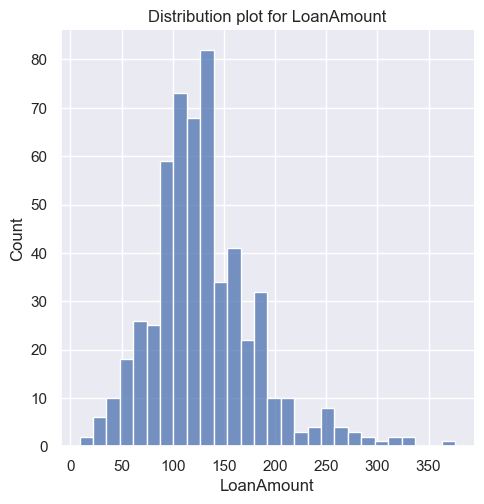

C:\Users\Dhrithi K.A\AppData\Local\Temp\ipykernel_15860\1301834532.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_y.Imputed_loan_amount)


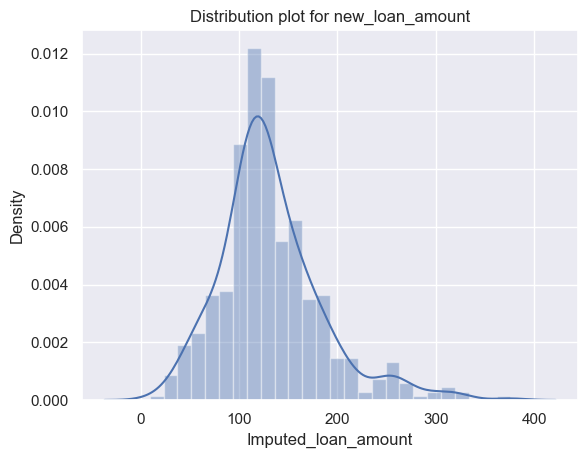

In [420]:
print("Comaprison of distributions for Loan amount before and after Imputation \n \n")
sns.displot(data_y.LoanAmount)
plt.title('Distribution plot for LoanAmount')
# Set x-axis label
plt.xlabel('LoanAmount')
plt.show()
sns.distplot(data_y.Imputed_loan_amount)
plt.title('Distribution plot for new_loan_amount')
# Set x-axis label
plt.xlabel('Imputed_loan_amount')

plt.show()

Although the mean of the data seems to have changed slighlty, we can see that there is no significance diffference in the distribution observed. Hence moving forward with this Null imputation technique.

In [421]:
#Imputing missing values in Loan Amount with KNN Imputer
df['LoanAmount'] = data_y["Imputed_loan_amount"]

In [422]:
df.LoanAmount.isnull().sum()

np.int64(60)

## <font color=Blue>Marital status Missing records

Since Married column is categorical,  and has only 3 null records,I am planning to use mode imputation for the same.

In [423]:
# Check number of missing values
print("Missing values in 'Married' before imputation:", df["Married"].isnull().sum())

# Mode imputation for 'Married' column (categorical)
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Check after imputation
print("Missing values in 'Married' after imputation:", df["Married"].isnull().sum())


Missing values in 'Married' before imputation: 0
Missing values in 'Married' after imputation: 0


#<font color=black> 5. Research various methods of outlier treatments. Perform outlier treatment on applicant’s income and co-applicant’s income (10)

Outliers are the observations that are markedly different in value from the others of the sample. Just because a value is different from other values, we may not consider it to be an outlier. Check for domain significance and then decide.

There are 2 major outlier treatments
1. Interquartile Range(IQR) Method, In this method we try to find lower and upper whiskers from the Box plots and delete values below and above these whiskers respectively.
2. Z Score method: Data point that falls outside of 3 standard deviations in the data distribution will be deleted.
3. Normalize the data, to fit the data to model. This will not reduce outliers, but will reduce the unnessarry  errors that might be induced into the model due to the huge range of values brought in due to the outliers in the data.

## <font color=Blue>Applicant Income

In [424]:
df.ApplicantIncome.isnull().sum()

np.int64(0)

In [425]:
df.ApplicantIncome.describe()

count      548.000000
mean      4128.978102
std       1907.396960
min        150.000000
25%       2768.750000
50%       3656.000000
75%       5000.000000
max      10139.000000
Name: ApplicantIncome, dtype: float64

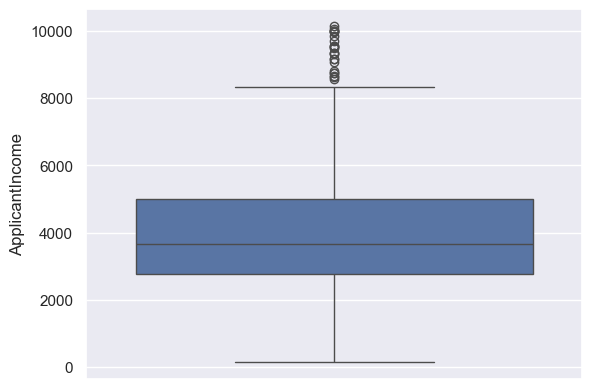

In [426]:
#Check for outliers with box and violun plots
sns.boxplot(y='ApplicantIncome', data=df)
plt.show()

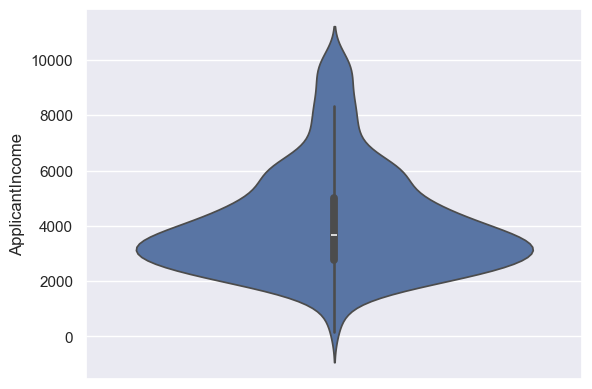

In [427]:
sns.violinplot(y='ApplicantIncome', data=df)
plt.show()

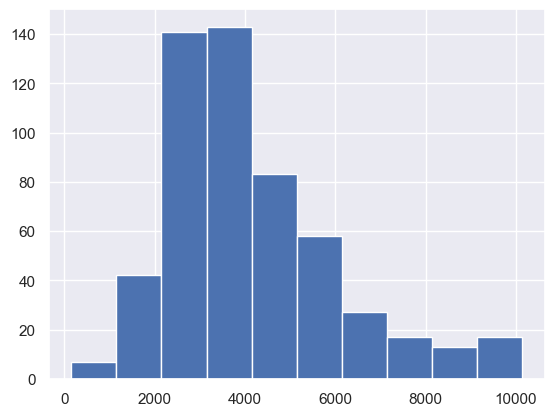

In [428]:
df.ApplicantIncome.hist()
plt.show()

The above figures  and values show that there are many outliers in the data.

But since this is a Loan approval problem, I would not consider the amount mentioned as outiers as there could be a student with very low income, as low as 150 and there could be  CEO of the company who applied for loan and has 80000 income. Hence considering the domain knowlegde, I would not not delete the outliers. Instead, I would apply standardization/ Normalization techniques to the data before fitting a Machine Leraning model to it.

Saying that lets look at one of the outlier treatment method, that could be applied for other outlier issues.

Lets look at summary statistics for these values and apply IQR method


In [429]:
Q1=df["ApplicantIncome"].quantile(0.25)
Q3=df["ApplicantIncome"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2768.75
5000.0
2231.25
-578.125 8346.875


In [430]:
#For outlier treatement geenerally we end up deleting the values greate than upper whisker and lower than lower whisker
df = df[(df["ApplicantIncome"]< Upper_Whisker) & (df["ApplicantIncome"]> Lower_Whisker)]


In [431]:
df.shape

(524, 15)

Had we followed this mehtod, we would delete cloase to 50 records.

In [432]:
from sklearn.preprocessing import MinMaxScaler # To Normalize the data
minMax = MinMaxScaler()

In [433]:
data_y= df.copy()

In [434]:
data_y['Scaled_Application_Income']= minMax.fit_transform(df[["ApplicantIncome"]])

In [435]:
data_y.Scaled_Application_Income.describe()

count    524.000000
mean       0.456743
std        0.191845
min        0.000000
25%        0.313966
50%        0.418805
75%        0.562225
max        1.000000
Name: Scaled_Application_Income, dtype: float64

Statistics on Normalised data

In [436]:
Q1=data_y["Scaled_Application_Income"].quantile(0.25 )
Q3=data_y["Scaled_Application_Income"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.31396627565982405
0.562225073313783
0.24825879765395897
-0.058421920821114415 0.9346132697947215


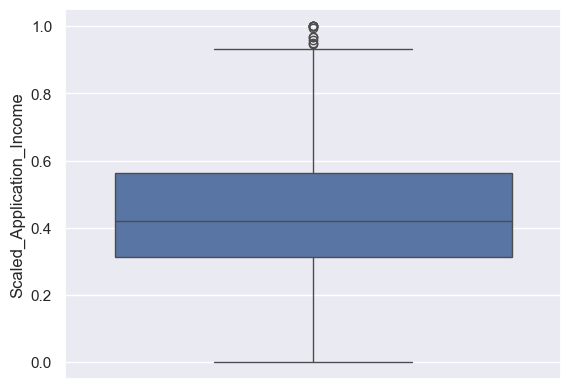

In [437]:
sns.boxplot(y='Scaled_Application_Income', data=data_y)
plt.show()

This scaled data could be used to reduce the effect of extreme values on the model. The ouliers have not changed as such but the range has been brought down.

## <font color=Blue>Co-Applicant Income

In [438]:
df.CoapplicantIncome.isnull().sum()

np.int64(0)

In [439]:
df.CoapplicantIncome.describe()

count     524.000000
mean     1388.015114
std      1445.677107
min         0.000000
25%         0.000000
50%      1399.000000
75%      2259.250000
max      5701.000000
Name: CoapplicantIncome, dtype: float64

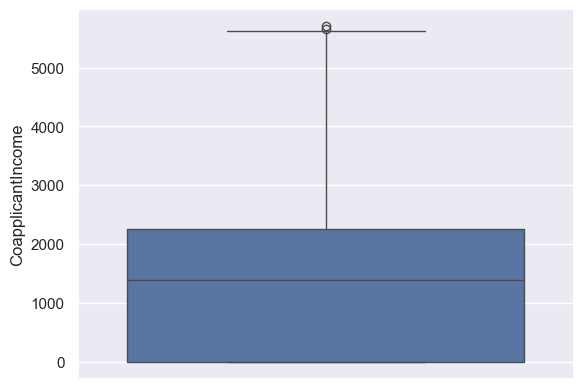

In [440]:
#Check for outliers with box and violun plots
sns.boxplot(y='CoapplicantIncome', data=df)
plt.show()

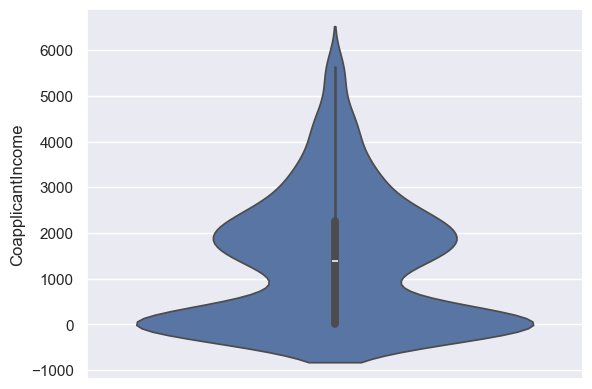

In [441]:
sns.violinplot(y='CoapplicantIncome', data=df)
plt.show()

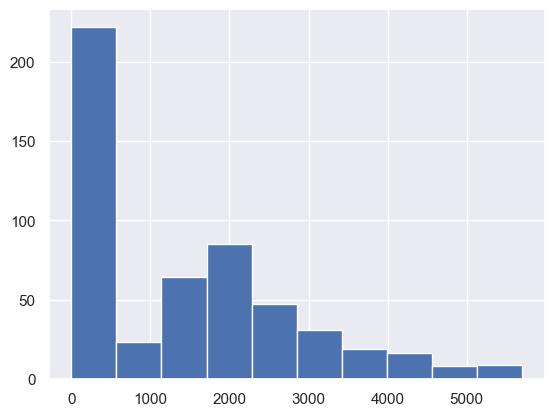

In [442]:
df.CoapplicantIncome.hist()
plt.show()

The above figures show that there are many outliers in the data.

But since this is a Loan approval problem, as mentioned earlier, I would not consider the amount mentioned as outiers as the co applicant could be a student with very low income, as low as 150 and there could be  CEO of the company who has co-applied for loan and has 80000 income. Hence considering the domain knowlegde, I would not not delete the outliers. Instead, I would apply standardization/ Normalization techniques to the data before fitting a Machine Leraning model to it.

Lets try and apply IQR method and see what happens


In [443]:
Q1=df["CoapplicantIncome"].quantile(0.25 )
Q3=df["CoapplicantIncome"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
2259.25
2259.25
-3388.875 5648.125


In [444]:
#For outlier treatement geenerally we end up deleting the values greate than upper whisker and lower than lower whisker
df = df[(df["CoapplicantIncome"]< Upper_Whisker) & (df["CoapplicantIncome"]> Lower_Whisker) ]

In [445]:
df.shape

(522, 15)

Had we followed this mehtod, we would delete 20 records, which might not be actual outliers.

There are no null values in the applicant income values




In [446]:
from sklearn.preprocessing import MinMaxScaler # To Normalising the data
minMax = MinMaxScaler()

In [447]:
# Fit and transform the 'CoapplicantIncome' column
df['Scaled_CoapplicantIncome'] = minMax.fit_transform(df[['CoapplicantIncome']])

# Display basic statistics of the scaled column
df['Scaled_CoapplicantIncome'].describe()

count    522.000000
mean       0.243836
std        0.253113
min        0.000000
25%        0.000000
50%        0.247556
75%        0.400400
max        1.000000
Name: Scaled_CoapplicantIncome, dtype: float64

Statistics on Normalised data

In [448]:
Q1 = df["Scaled_CoapplicantIncome"].quantile(0.25)
Q3 = df["Scaled_CoapplicantIncome"].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print("Lower Whisker:", Lower_Whisker)
print("Upper Whisker:", Upper_Whisker)

Q1: 0.0
Q3: 0.40040000000000003
IQR: 0.40040000000000003
Lower Whisker: -0.6006
Upper Whisker: 1.0010000000000001


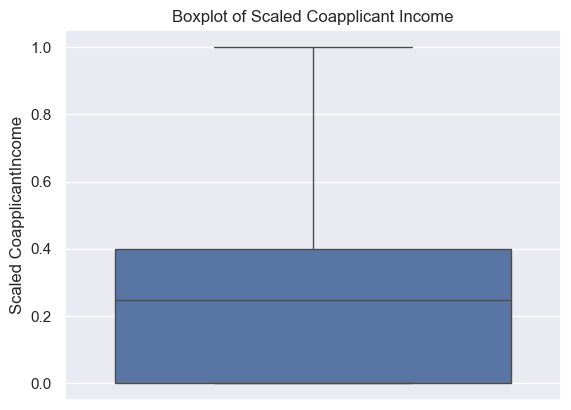

In [449]:
sns.boxplot(y="Scaled_CoapplicantIncome", data=df)

plt.title("Boxplot of Scaled Coapplicant Income")
plt.ylabel("Scaled CoapplicantIncome")

plt.show()

This scaled data could be used to reduce the effect of extreme values on the model. The ouliers have not changed as such but the range has been brought down.

# <font color=black>6. Generate histograms for applicant’s income and loan amount for each of education type. Plot the histograms on same graph and specify the type of distribution they follow. (10)

In [450]:
import matplotlib.pyplot as plt
import seaborn as sns

In [451]:
df.Education.value_counts()

Education
Graduate        391
Not Graduate    131
Name: count, dtype: int64

In [452]:
df.Education.isnull().sum()

np.int64(0)

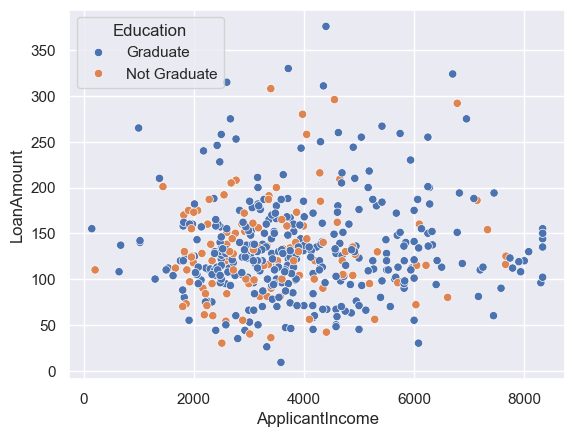

In [453]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", hue="Education", data=df)
plt.show()

Income and Loan amount are lower for Non-graduate applicants

## <font color=Blue>Histograms

Histogram for Loan amount based on Education status


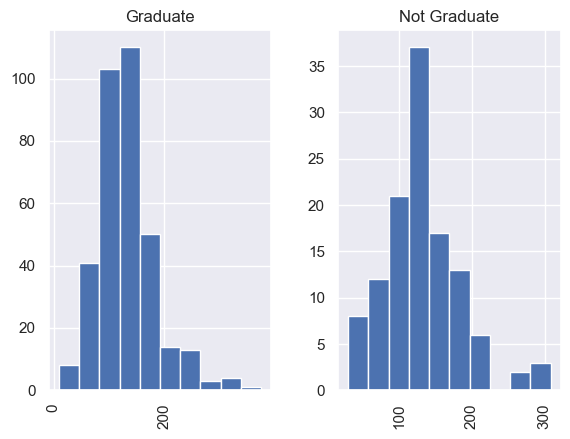


 
Histogram for Applicant Income based on Education status


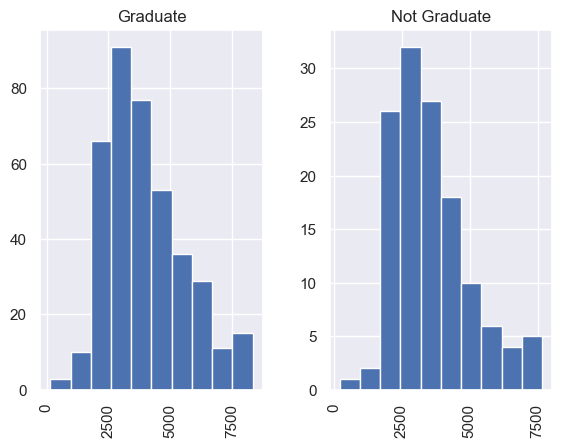

In [454]:
#sns.set() #rescue matplotlib's styles from the early '90s
print("Histogram for Loan amount based on Education status")
df.hist(by='Education',column = 'LoanAmount')
plt.show()
print("\n \nHistogram for Applicant Income based on Education status")
df.hist(by='Education',column = 'ApplicantIncome')

plt.show()

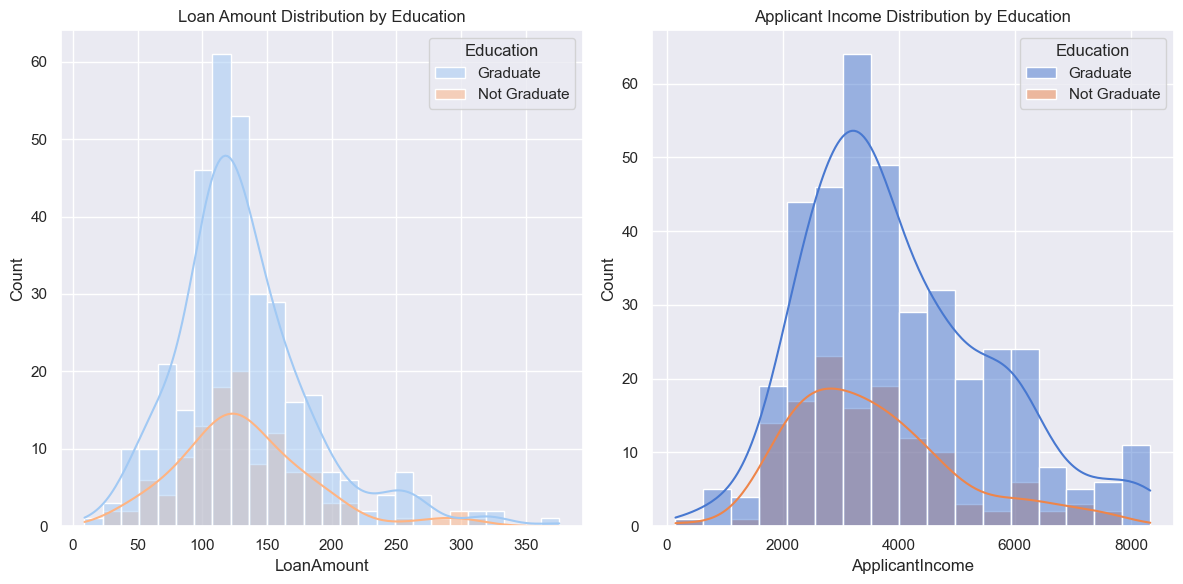

In [455]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LoanAmount', hue='Education', kde=True, palette='pastel')
plt.title('Loan Amount Distribution by Education')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='ApplicantIncome', hue='Education', kde=True, palette='muted')
plt.title('Applicant Income Distribution by Education')

plt.tight_layout()
plt.show()


## <font color=Blue>shapiro for normality

In [456]:
from scipy.stats import shapiro   #Shapiro-Wilk Test to check if the data is normally distributed 
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(df[df.Education=='Graduate'].LoanAmount)
print('stat=%.3f, p=%.30f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=nan, p=nan
Probably not Gaussian


In [457]:
stat, p = shapiro(df[df.Education=='Not Graduate'].LoanAmount)
print('stat=%.3f, p=%.30f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=nan, p=nan
Probably not Gaussian


In [458]:
stat, p = shapiro(df.LoanAmount)
print('stat=%.3f, p=%.40f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=nan, p=nan
Probably not Gaussian


In [459]:
stat, p = shapiro(df[df.Education=='Not Graduate'].ApplicantIncome)
print('stat=%.3f, p=%.30f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.937, p=0.000012546161385064132513301495
Probably not Gaussian


In [460]:
stat, p = shapiro(df[df.Education=='Graduate'].ApplicantIncome)
print('stat=%.3f, p=%.40f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.960, p=0.0000000070004951114447159202562408599271
Probably not Gaussian


In [461]:
stat, p = shapiro(df.ApplicantIncome)
print('stat=%.3f, p=%.30f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian') #Null Hypothesis
else:
	print('Probably not Gaussian')

stat=0.956, p=0.000000000020554467902403909806
Probably not Gaussian


Since the critical value obtained is greater than the significane level, we reject null hypothesis, and say the data is not  Normally distributed 

Above test results show the data is not normally distributed

## <font color=Blue>Anderson test for finding the distribution

In [462]:
from scipy.stats import  anderson # Anderson test for finding distribution
#If the returned statistic is larger than these critical values then for the corresponding significance level, 
#the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references.
anderson(df.ApplicantIncome, dist='norm',)

AndersonResult(statistic=np.float64(7.605746870825442), critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(3885.2318007662834), scale=np.float64(1569.1419363508173))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [463]:
# ‘expon’, ‘logistic’, ‘
anderson(df.ApplicantIncome, dist='expon',)

AndersonResult(statistic=np.float64(89.07844366409563), critical_values=array([0.921, 1.077, 1.339, 1.604, 1.955]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.0), scale=np.float64(3885.2318007662834))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [464]:
anderson(df.ApplicantIncome, dist='logistic',)

AndersonResult(statistic=np.float64(5.918240864017662), critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]), fit_result=  params: FitParams(loc=np.float64(3746.0595205811337), scale=np.float64(882.197458498497))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [465]:
anderson(df.LoanAmount, dist='norm',)

AndersonResult(statistic=np.float64(nan), critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(131.81112871064212), scale=np.float64(52.68469319889731))
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')

In [466]:
anderson(df.LoanAmount, dist='expon',)


AndersonResult(statistic=np.float64(nan), critical_values=array([0.921, 1.077, 1.339, 1.604, 1.955]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.0), scale=np.float64(131.81112871064212))
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')

In [467]:
anderson(df.LoanAmount, dist='logistic',)

AndersonResult(statistic=np.float64(nan), critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]), fit_result=  params: FitParams(loc=np.float64(136.93778124291669), scale=np.float64(26.248086982240245))
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')

All the above test results show that the data does not belong to expon, Logistic or normal distribution

## <font color=Blue>kstest for log normality

In [469]:
from scipy.stats import kstest, lognorm
import numpy as np

data = df["ApplicantIncome"].replace([np.inf, -np.inf], np.nan).dropna()

shape, loc, scale = lognorm.fit(data)

ks_stat, p_value = kstest(data, 'lognorm', args=(shape, loc, scale))

print("K-S Statistic:", ks_stat)
print("P-value:", p_value)

if p_value > 0.05:
    print("The data likely follows a lognormal distribution (fail to reject H0).")
else:
    print("The data does not follow a lognormal distribution (reject H0).")


K-S Statistic: 0.04502034599234317
P-value: 0.23351070885681935
The data likely follows a lognormal distribution (fail to reject H0).


In [470]:
kstest(df.ApplicantIncome, "lognorm", lognorm.fit(df.ApplicantIncome)) 

KstestResult(statistic=np.float64(0.04502034599234317), pvalue=np.float64(0.23351070885681935), statistic_location=np.int64(3750), statistic_sign=np.int8(1))

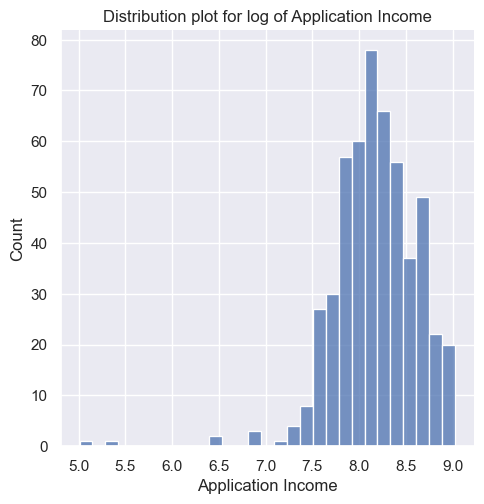

In [471]:
sns.displot(np.log(df['ApplicantIncome']))
plt.title('Distribution plot for log of Application Income')
# Set x-axis label
plt.xlabel('Application Income')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

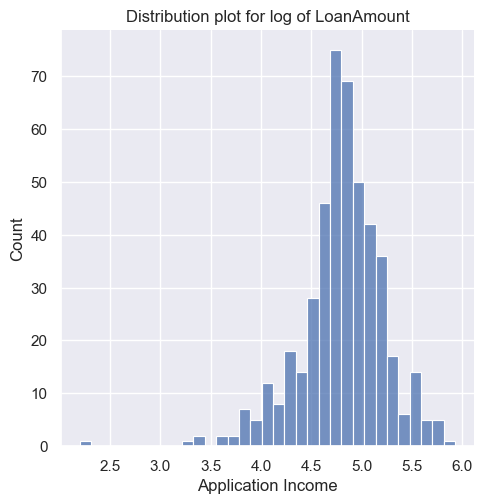

In [472]:
sns.displot(np.log(df['LoanAmount']))
plt.title('Distribution plot for log of LoanAmount')
# Set x-axis label
plt.xlabel('Application Income')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

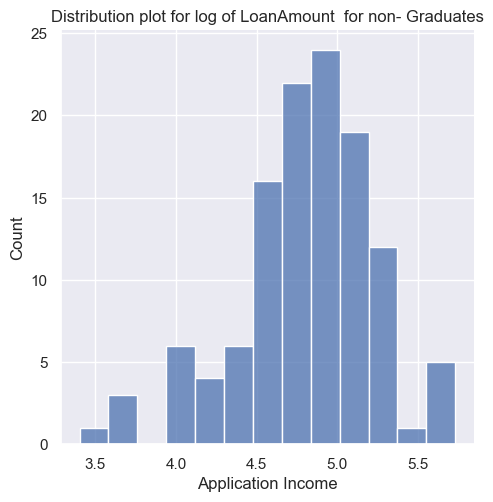

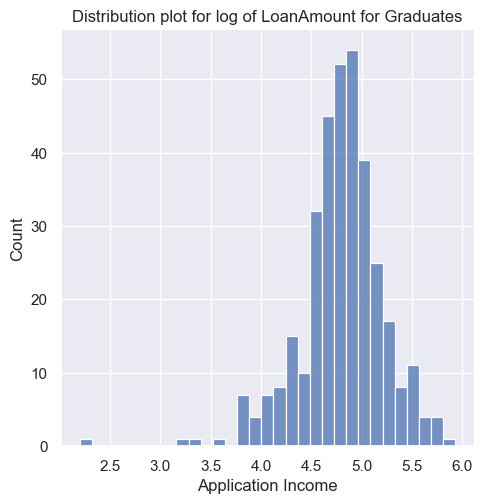

In [476]:
sns.displot(np.log(df[df.Education=='Not Graduate']['LoanAmount']))
plt.title('Distribution plot for log of LoanAmount  for non- Graduates')
# Set x-axis label
plt.xlabel('Application Income')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

sns.displot(np.log(df[df.Education=='Graduate']['LoanAmount']))
plt.title('Distribution plot for log of LoanAmount for Graduates')
# Set x-axis label
plt.xlabel('Application Income')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

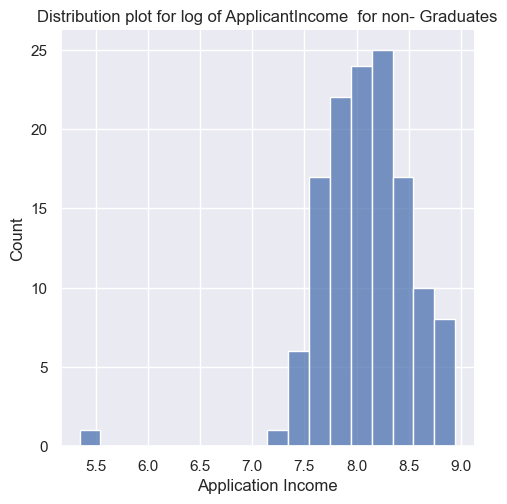

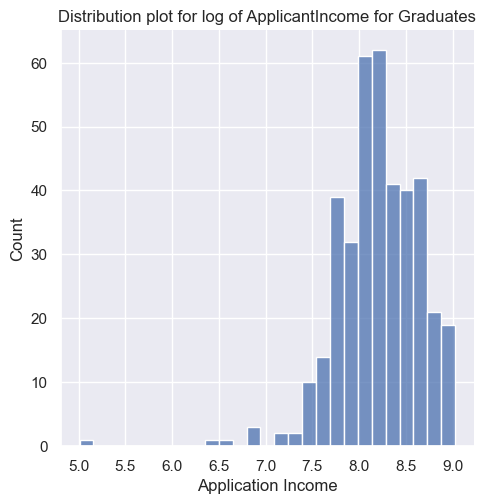

In [477]:
sns.displot(np.log(df[df.Education=='Not Graduate']['ApplicantIncome']))
plt.title('Distribution plot for log of ApplicantIncome  for non- Graduates')
# Set x-axis label
plt.xlabel('Application Income')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

sns.displot(np.log(df[df.Education=='Graduate']['ApplicantIncome']))
plt.title('Distribution plot for log of ApplicantIncome for Graduates')
# Set x-axis label
plt.xlabel('Application Income')
# # Set y-axis label
# plt.ylabel('Sepal Width')
plt.show()

## <font color=Blue>Conclusion for 6th Question

The above tests results show the data does not belong to Normal, Exponential or Logistic distribution

From the above two graphs and data it is evident that the loan amount and Applicant income are right skewed fit log - normal distribution.

Both these variables based on their education status, when log transformed appreared to follow normal distribution. Hence we can say these variables follow log-normal distribution.






# <font color=black>7. Answer these hypotheses with appropriate visualizations and tests

## <font color=Blue>a. Are males having a higher loan approval status?


Since both the gender and loan_status are categorical, I would use chi square contigency test to check whether the variable Gender (Male and Female) have any dependency on loan approval status. If there is dependency, then it is obvious that the females/Males category plays a role in Loan approval. Lets check this intially with a graph and then with the statitical chi square test.

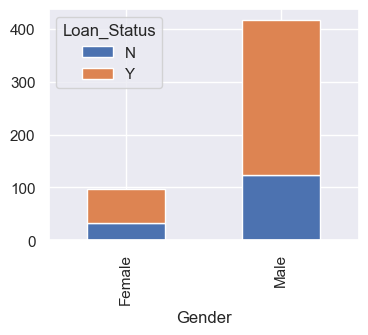

In [478]:
pd.crosstab(index=df["Gender"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)
plt.show()

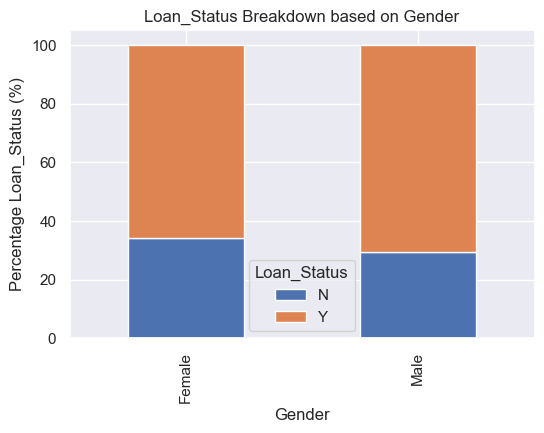

In [479]:
#Showing the proportional comparison
stacked_data = pd.crosstab(index=df["Gender"], columns=df["Loan_Status"]).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Loan_Status Breakdown based on Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage Loan_Status (%)")
plt.show()

Even though the number of female applicants are less than male applicants, proportion of loan approvals seems to be similar. Checking the Tabular results.

In [480]:
table = pd.crosstab(df['Loan_Status'], df['Gender'])
table

Gender,Female,Male
Loan_Status,,
N,33,123
Y,64,294


In [481]:
#Observed Values
Observed_Values = table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 33 123]
 [ 64 294]]


Contingenct Chisquared test

In [482]:
val=stats.chi2_contingency(table) #Setting up the test

In [483]:
Expected_Values=val[3] # Expected table of values

In [484]:
Expected_Values #Expected values when there is no dependency between variables, that is under H0

array([[ 29.43968872, 126.56031128],
       [ 67.56031128, 290.43968872]])

In [485]:
#Calaculating degrees of Freedom
no_of_rows=len(table.iloc[0:2,0])
no_of_columns=len(table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [486]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)]) #Chi squared statistic calauclation
chi_square_statistic=chi_square[0]+chi_square[1]

In [487]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.7619910743417811


In [488]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [489]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.3827061384418996
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.3827061384418996


In [490]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


we conclude that the Male/ Female category variable is independent of Loan_Approval_status.Hence male laon approvals should ideeally be similar to that of Female.


## <font color=Blue>b. Are graduates earning more income than non-graduates?


In [491]:
data1 = df[df.Education=='Graduate']['ApplicantIncome']
data2 = df[df.Education=='Not Graduate']['ApplicantIncome']

In [492]:
data1.mean() # Non graduated

np.float64(3989.8312020460357)

In [493]:
data2.mean() # Graduated

np.float64(3573.030534351145)

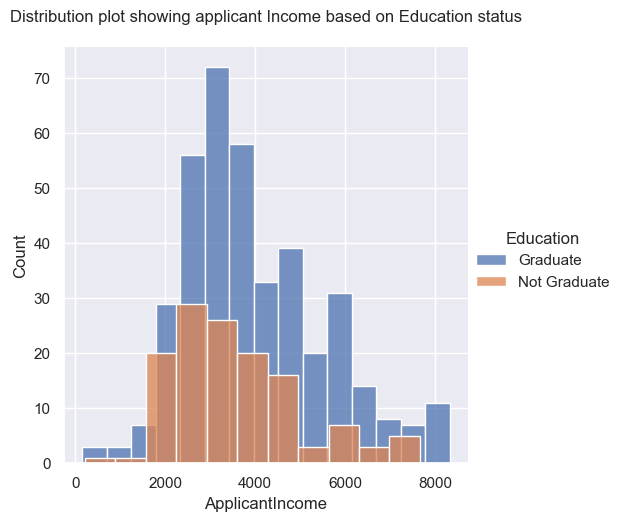

In [494]:
sns.FacetGrid(df,hue='Education',height=5).map(sns.histplot,'ApplicantIncome').add_legend() # Distribution plot
plt.title("Distribution plot showing applicant Income based on Education status\n")
plt.show()

Histogram for ApplicantIncome based on Education status



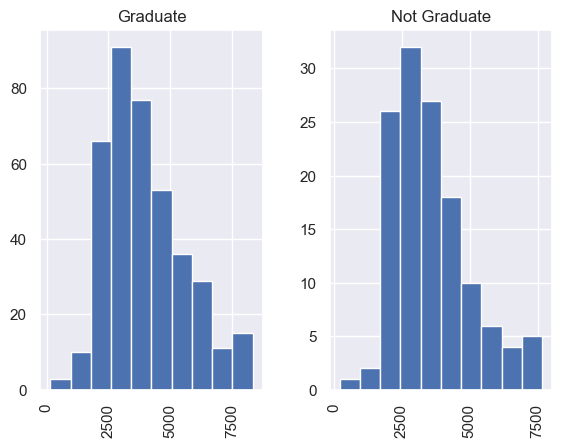

In [495]:
print("Histogram for ApplicantIncome based on Education status\n")
df.hist(by='Education',column = 'ApplicantIncome')
#plt.title("Histogram plot showing applicant Income based on Education status\n")
plt.show()

Above figures clearly show the mean value of graduade income is greater than non- graduate.

We further use t test to check the statitical significance of this statetment . The data can be divided into two groups based on education status and check if there are statistically differecnt. If there are more than 2 groups, then we can use Anova 

In [496]:
t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
print('stat=%.3f, p=%.9f' % (t_stat, p_val))

stat=2.786, p=0.005757285


The p value is actually calculated from the cumulative density function:
Here, len(data1) + len(data2) - 2  is the number of degrees of freedom
Notice the multiplication with 2 in the below cell. If the test is one-tailed, we don't multiply.

In [497]:
#The p value is actually calculated from the cumulative density function for a 2 tailed test:
print(' p=%.9f' % (t.cdf(-abs(t_stat), len(data1) + len(data2) - 2) * 2))

 p=0.005535012


So our p-value for a left tailed test is : t.cdf(t_stat, len(data1) + len(data2) - 2) - we take if from cumulative density function

If it is right tailed test : t.sf(t_stat, len(data1) + len(data2) - 2) -- we take if from survival function .

In [498]:
#Since this is right tailed test
p_righttailed= t.sf(t_stat, len(data1) + len(data2) - 2)
print('p=%.9f'%t.sf(t_stat, len(data1) + len(data2) - 2))

p=0.002767506


In [499]:
# H0: the means of the samples are equal.
# H1: the means of the samples are unequal.
if p_righttailed > 0.05: #Since scipy does not have one sided test, we can check for significance by considering p/2 for one tailed test -- Explanation is given in link below
	print(' H0: The sample means of Educated is <=  Uneducated -  We failed to reject H0')
else:
	print('H1:  The sample means of Educated is greater than Uneducated - We could reject H0, Hence H1 might be true')


H1:  The sample means of Educated is greater than Uneducated - We could reject H0, Hence H1 might be true


With P as less as 0.000000008 We could reject null hypothesis, which means  Graduates  are earning more Income than Non- Graduates.

## <font color=Blue>c. Are self-employed applying for higher loan amount than employed?


In [500]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Loan_Income_Ratio', 'Scaled_CoapplicantIncome'],
      dtype='object')

In [501]:
data1 = df[df.Self_Employed=='Yes']['LoanAmount']
data2 = df[df.Self_Employed=='No']['LoanAmount']

In [502]:
data1.mean() # Self_Employed

np.float64(141.61159013459852)

In [503]:
data2.mean() # Not Self_Employed

np.float64(130.81081355380283)

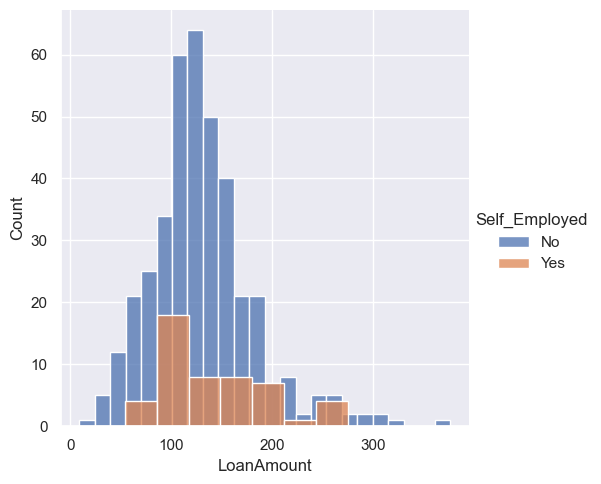

In [504]:
sns.FacetGrid(df,hue='Self_Employed',height=5).map(sns.histplot,'LoanAmount').add_legend() # Distribution plot
plt.show()

Histogram for LoanAmount based on the applicantant selfemployment status


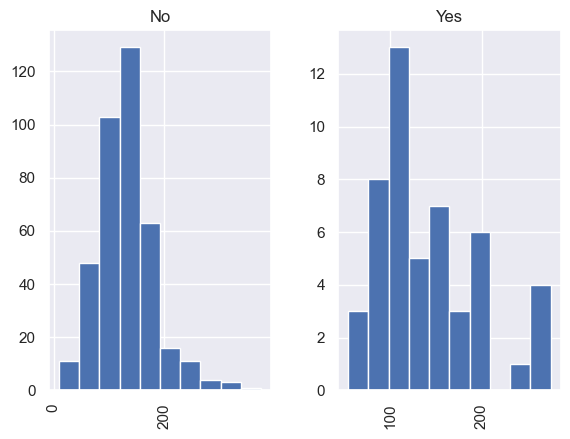

In [505]:
print("Histogram for LoanAmount based on the applicantant selfemployment status")
df.hist(by='Self_Employed',column = 'LoanAmount')
plt.show()

There seems to be a slight differenec in the loan amounts and Selfemployed seem to have higher mean loan amount. Lets check if it is statistically correct.

We can use same ttest as used in the above case annd same rules would apply for one sided test

In [506]:
# H0: the means of the samples are equal.
# H1: the means of the samples are unequal.
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = df[df.Self_Employed=='Yes']['LoanAmount']
data2 = df[df.Self_Employed=='No']['LoanAmount']
stat, p = ttest_ind(data1, data2,equal_var=True)
print('stat=%.3f, p=%.9f' % (stat, p))
if p/2 > 0.05: #Since scipy does not have one tained test, we can check for significance by considering p/2 for one tailed test as explained in 7-b
	print(' H0: The means of Loan amounts for  Self Employed is <=   means of Loan amounts for  not Self Employed-  We failed to reject H0')
else:
	print('H1:  The means of Loan amounts for  Self Employed is >   means of Loan amounts for  not Self Employed - Rejected H0, Hence H1 might be true')

stat=nan, p=nan
H1:  The means of Loan amounts for  Self Employed is >   means of Loan amounts for  not Self Employed - Rejected H0, Hence H1 might be true


This shows the loan amounts for self employed is higher than the others.

## <font color=Blue>d. Is there a relationship between self-employment and education status?


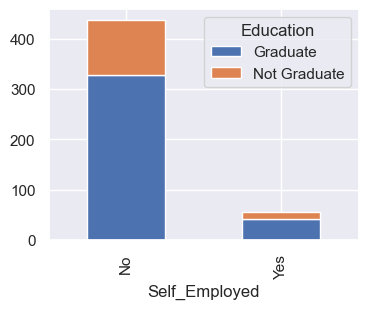

In [507]:
pd.crosstab(index=df["Self_Employed"], columns=df["Education"]).plot(kind="bar",figsize=(4,3),stacked=True)
plt.show()

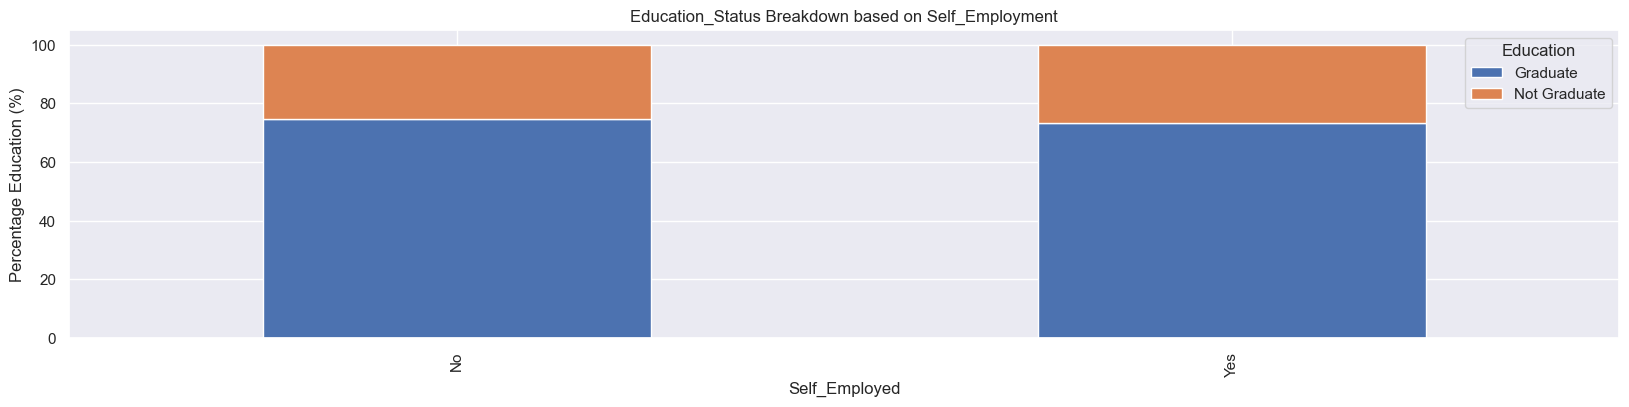

In [508]:
#Showing the proportional comparison
stacked_data = pd.crosstab(index=df["Self_Employed"], columns=df["Education"]).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,4))
plt.title("Education_Status Breakdown based on Self_Employment")
plt.xlabel("Self_Employed")
plt.ylabel("Percentage Education (%)")
plt.show()

This graph does not convey any strong relationsips. let try to use a statistical test to find the relationship. 

This can be uncovered using chi squared test with both the variables being categorical.

In [509]:
#Contingency table
table = pd.crosstab(df['Self_Employed'], df['Education'])
table

Education,Graduate,Not Graduate
Self_Employed,,
No,327,110
Yes,41,15


In [510]:
stat, p, dof, expected = chi2_contingency(table)

In [511]:
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent based on critical value (reject H0)')
else:
	print('Independent  based on critical value (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent based on p value (reject H0)')
else:
	print('Independent based on p value (fail to reject H0)')

dof=1
[[326.19878296 110.80121704]
 [ 41.80121704  14.19878296]]
probability=0.950, critical=3.841, stat=0.010
Independent  based on critical value (fail to reject H0)
significance=0.050, p=0.922
Independent based on p value (fail to reject H0)


This shows that self_employed status and Education are independent variables and we failed to reject Null hypothesis. Hence, there is no relationship between self employment and education status.

## <font color=Blue>e. Is urbanicity of loan property related to loan approval status?


Urbanicity and Loan approval

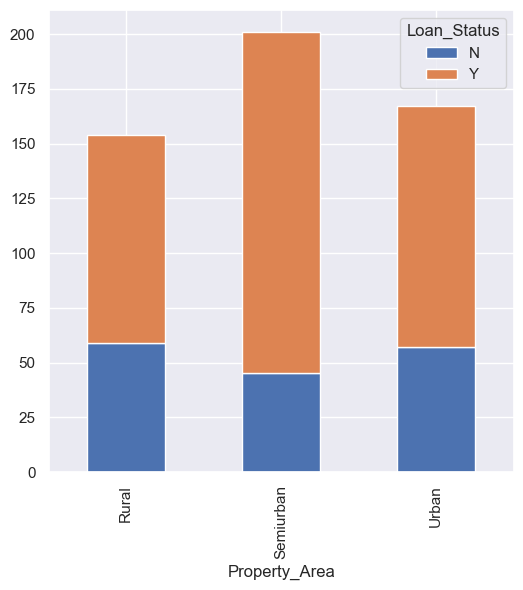

In [512]:
pd.crosstab(index=df["Property_Area"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(6,6),stacked=True)
plt.show()

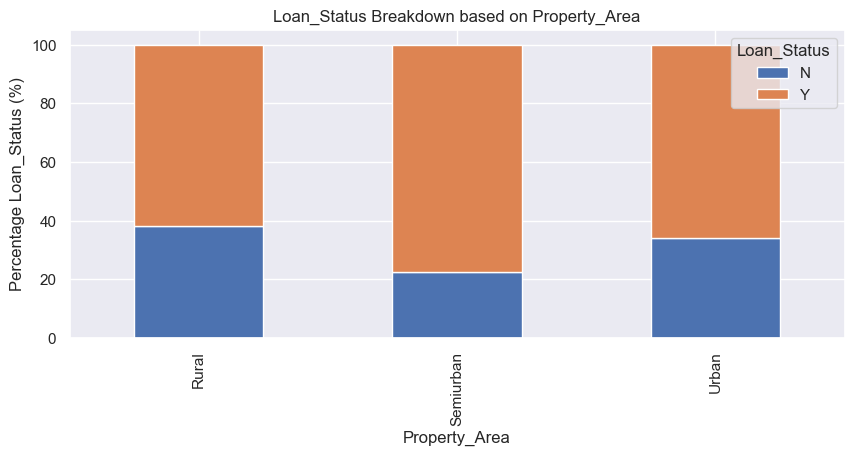

In [513]:
#Showing the proportional comparison
stacked_data = pd.crosstab(index=df["Property_Area"], columns=df["Loan_Status"]).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(10,4))
plt.title("Loan_Status Breakdown based on Property_Area")
plt.xlabel("Property_Area")
plt.ylabel("Percentage Loan_Status (%)")
plt.show()

The graph shows semi urban and urban  and rural have higher loan approval conversion rates. To find the relation statitically between these 2 variables, we can apply cisquared test with contingency table. This is similar to the above case

In [514]:
#Contingency Tble
table = pd.crosstab(df['Property_Area'], df['Loan_Status'])
table

Loan_Status,N,Y
Property_Area,,
Rural,59,95
Semiurban,45,156
Urban,57,110


In [515]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=2
[[ 47.49808429 106.50191571]
 [ 61.99425287 139.00574713]
 [ 51.50766284 115.49233716]]
probability=0.950, critical=5.991, stat=11.610
Dependent (reject H0)
significance=0.050, p=0.003
Dependent (reject H0)


This states that there is dependeny between Property_Area and Loan_Status according to contigency table Chi squared test.

Now lets repeat the same test grouping the Urban and semiurban to one category and chekc if the Rural category has any significance.

---



In [516]:
data_y['Property_Area_Urban']= np.where(data_y['Property_Area'] == 'Rural', 'Rural', 'Urban')
table = pd.crosstab(data_y['Property_Area_Urban'], data_y['Loan_Status'])
table

Loan_Status,N,Y
Property_Area_Urban,,
Rural,59,95
Urban,102,268


In [517]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[ 47.31679389 106.68320611]
 [113.68320611 256.31679389]]
probability=0.950, critical=3.841, stat=5.403
Dependent (reject H0)
significance=0.050, p=0.020
Dependent (reject H0)


Now lets check for urban and semiurban 

In [518]:
data_y['Property_Area_Urban']= np.where(data_y['Property_Area'] == 'Rural', 'Rural', 'Urban')
table = pd.crosstab(data_y[data_y['Property_Area'] != 'Rural']['Property_Area'], data_y[data_y['Property_Area'] != 'Rural']['Loan_Status'])
table

Loan_Status,N,Y
Property_Area,,
Semiurban,45,157
Urban,57,111


In [519]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[ 55.68648649 146.31351351]
 [ 46.31351351 121.68648649]]
probability=0.950, critical=3.841, stat=5.666
Dependent (reject H0)
significance=0.050, p=0.017
Dependent (reject H0)


This above test shows both the Urban and Semi- urban have siginifacnt depencey on the Loan Approval status

Thus we can conclude from all the tests that the urbanicity is related to Loan approval status(Direction of relationship is not tested though).

## <font color=Blue>f. How is applicant’s income related to the loan amount that they get?


In [520]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'Loan_Income_Ratio', 'Scaled_CoapplicantIncome'],
      dtype='object')

In [521]:
df.ApplicantIncome.isnull().sum()

np.int64(0)

Applicants income and loan amount both being continous variables, we can find correlation between these two variables.Lets start with a scatter plot.

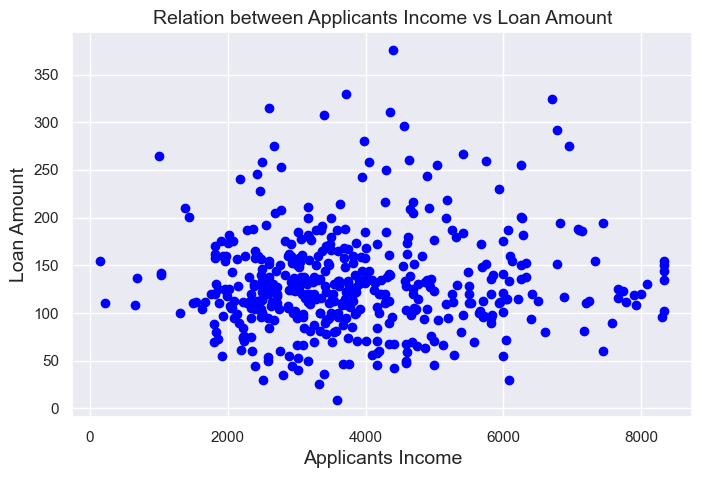

In [522]:
plt.figure(figsize=(8,5))
plt.scatter(x=df['ApplicantIncome'], y=df['LoanAmount'],color='blue');
plt.xlabel('Applicants Income',fontsize =14)
plt.ylabel('Loan Amount',fontsize =14);
plt.title("Relation between Applicants Income vs Loan Amount",fontsize =14);
plt.show()

The scatter plot shows that there is slight correlation.

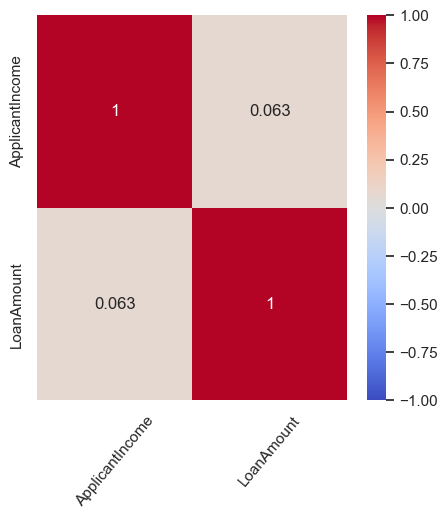

In [523]:
#correlation matrix
sns.set()
plt.figure(figsize=(5,5))
sns.heatmap(df[['ApplicantIncome','LoanAmount']].corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') # Correlation matrix for the dataframe
plt.xticks(rotation = 50)
plt.show()

0.58 is fairly good correlation value, but not highly correlated.

In [524]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df['ApplicantIncome']
data2 = df['LoanAmount']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=nan, p=nan
Probably dependent


From the above graphs and above test, it is clear that the Two variables are correlated and have monotonic, linear relationship

## <font color=Blue>g. How helpful is previous credit history in determining the loan approval?


I would again use chi square contingency table test, as both the variables are categorical.

In [525]:
table = pd.crosstab(df['Credit_History'], df['Loan_Status'])
table

Loan_Status,N,Y
Credit_History,,
0.0,72,5
1.0,78,322


In [526]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.9f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[ 24.21383648  52.78616352]
 [125.78616352 274.21383648]]
probability=0.950, critical=3.841, stat=160.633
Dependent (reject H0)
significance=0.050, p=0.000000000
Dependent (reject H0)


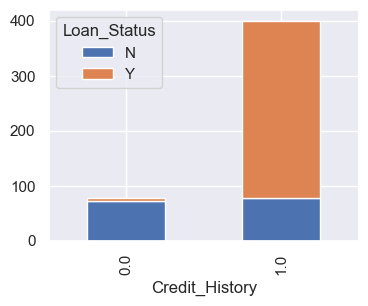

In [527]:
pd.crosstab(index=df["Credit_History"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)
plt.show()

This graph and the test, cleary shows that the credit history plays a major role in Loan approvals

## <font color=Blue>h. Are people with more dependents reliable for giving loans?


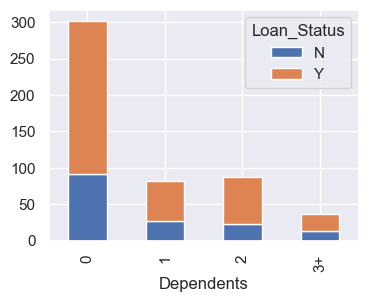

In [528]:
pd.crosstab(index=df["Dependents"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)
plt.show()

In [529]:
pd.crosstab(df.Loan_Status,df.Dependents).plot(kind='bar',figsize=(5,4),stacked=True)


<Axes: xlabel='Loan_Status'>

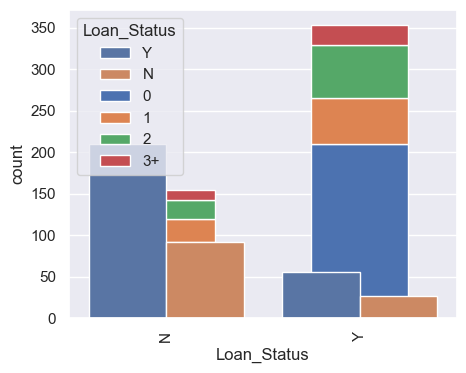

In [530]:
sns.countplot(x="Dependents", hue="Loan_Status", data=df)
plt.show()

The above graphs do not make any relationship eveident, there seems to be not much difference between loan approvals and the number of dependents category, considering the number of people in each group.

In [531]:
table = pd.crosstab(df['Dependents'], df['Loan_Status'])
table

Loan_Status,N,Y
Dependents,,
0,92,210
1,27,55
2,23,65
3+,13,24


In [532]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.9f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[ 91.96463654 210.03536346]
 [ 24.97053045  57.02946955]
 [ 26.79764244  61.20235756]
 [ 11.26719057  25.73280943]]
probability=0.950, critical=7.815, stat=1.394
Independent (fail to reject H0)
significance=0.050, p=0.706896236
Independent (fail to reject H0)


The above test proves that there is no relationship between number of dependents and loan status. Hence, just the high number of dependents might not be a good measure for Loan Approval.

# <font color=black>8. Explore the data further (only tables and visualizations) and identify any interesting relationship among attributes.

## <font color=Blue>EDA

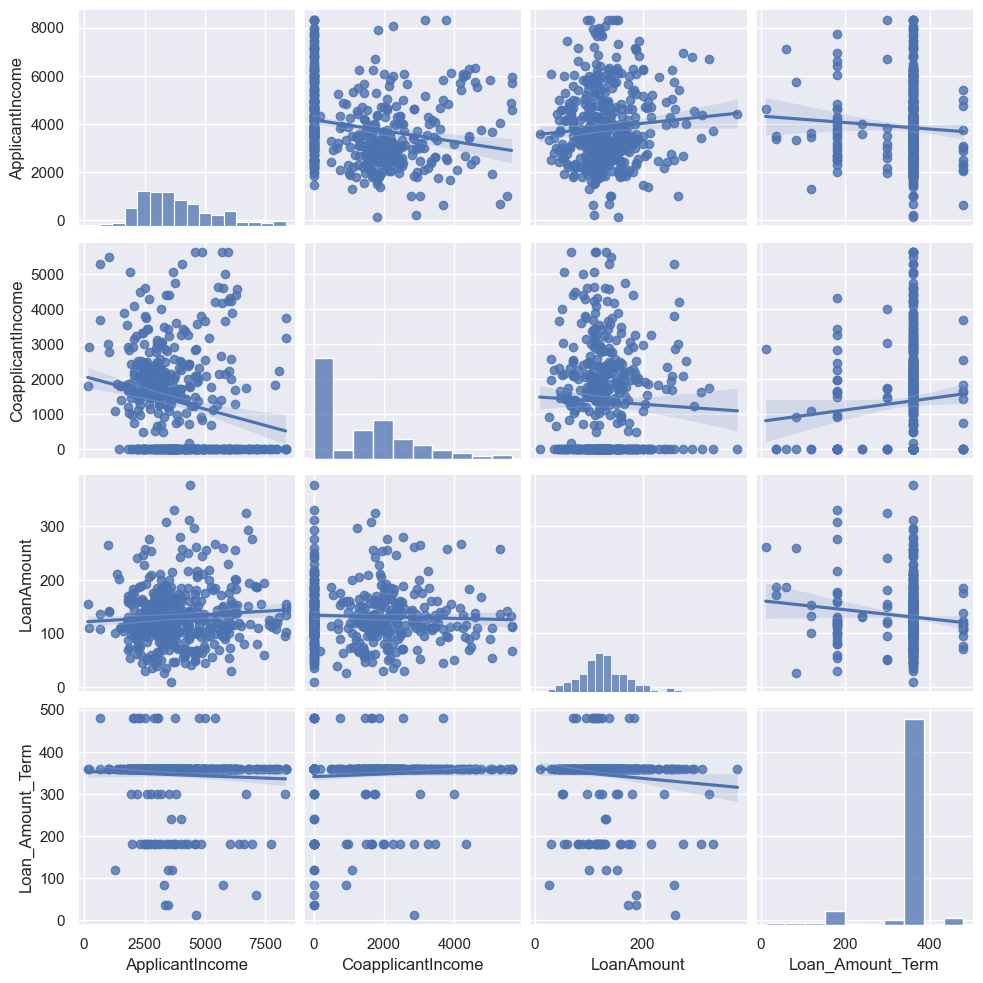

In [533]:
#Lets start further exploration with pairplots
sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].dropna(),kind="reg")
plt.show()

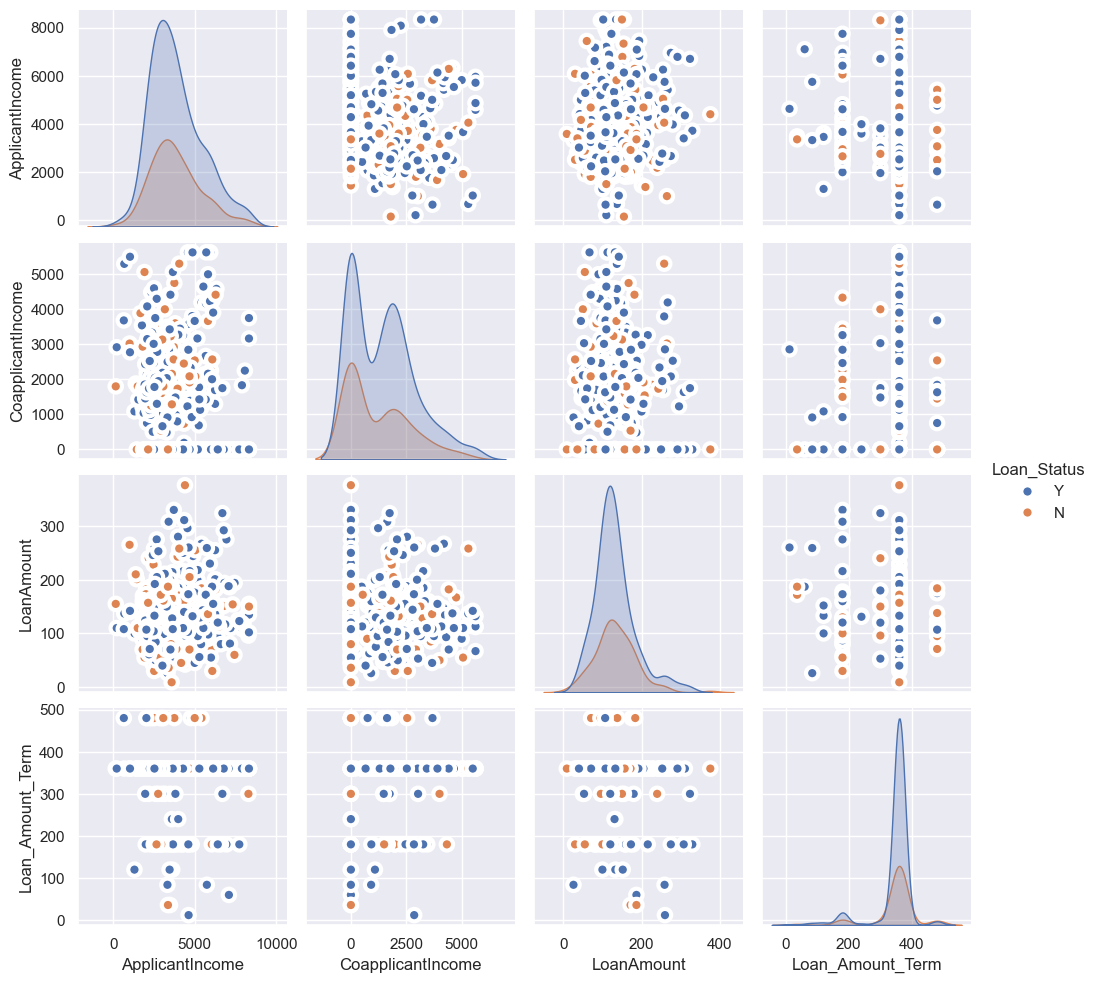

In [534]:
sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']].dropna(), kind="scatter", hue="Loan_Status", plot_kws=dict(s=80, edgecolor="white", linewidth=3))
plt.show()

From the above two graphs it s clear that the loan amount is correlated to applicant income  and co-applicant income sligtly

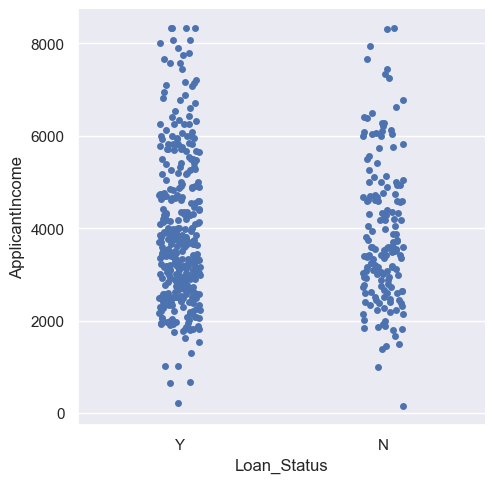

In [535]:
sns.catplot(x="Loan_Status", y="ApplicantIncome", data=df);
plt.show()

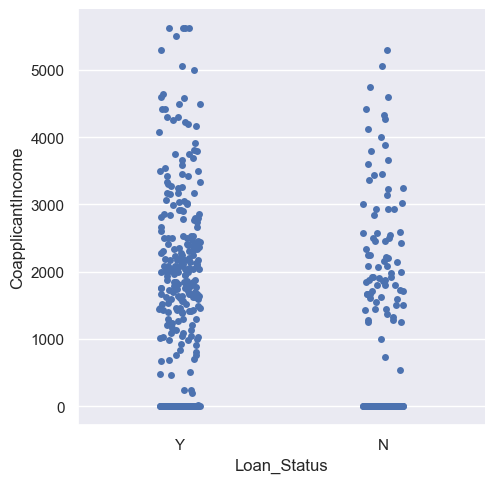

In [536]:
sns.catplot(x="Loan_Status", y="CoapplicantIncome", data=df);
plt.show()

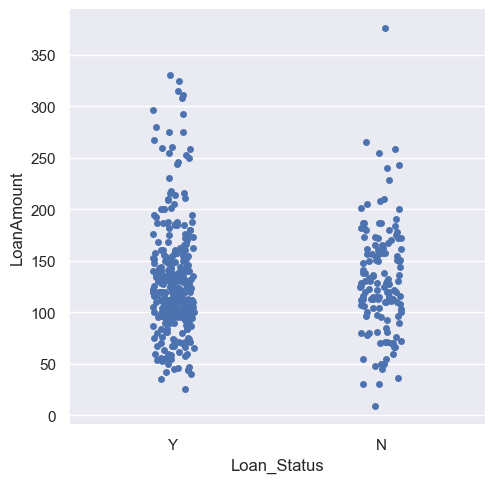

In [537]:
sns.catplot(x="Loan_Status", y="LoanAmount", data=df);
plt.show()

There does not seem to be clear relationship with Loan status and other quantitative variables. Lets check if these variables in combinations show some affect on dependent Variable.

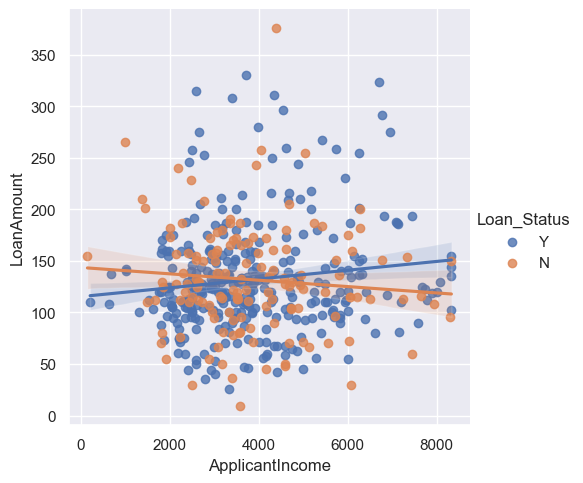

In [538]:
# sns.scatterplot(x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", data=data)
sns.lmplot(x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", data=df)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

For higher Loan amounts the Loan approvals rates tend to increase for applicants with higher Income. 

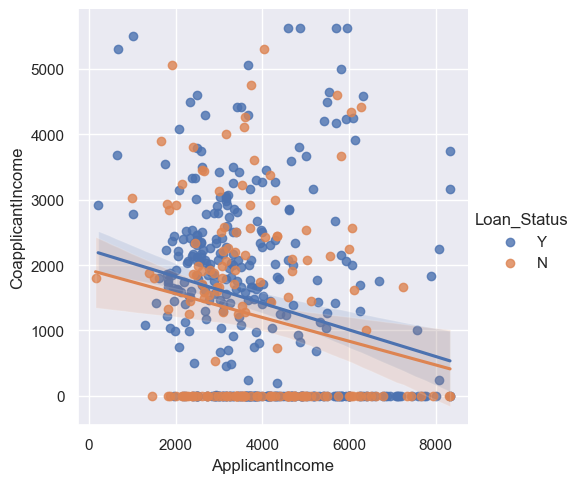

In [539]:
sns.lmplot(x="ApplicantIncome", y="CoapplicantIncome", hue="Loan_Status", data=df)
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()

This does not give concrete Information

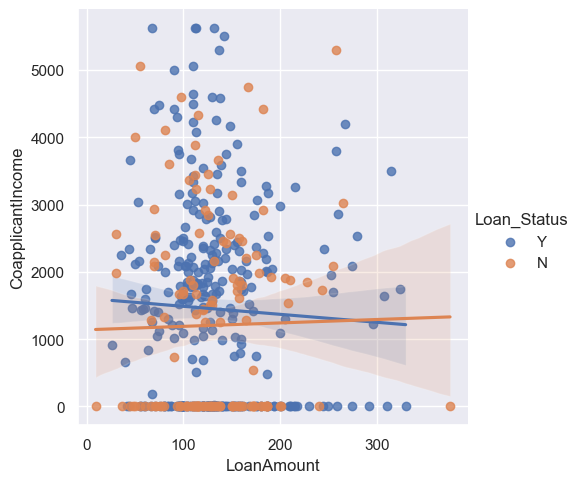

In [540]:
sns.lmplot(x="LoanAmount", y="CoapplicantIncome", hue="Loan_Status", data=df)
plt.xlabel('LoanAmount')
plt.ylabel('CoapplicantIncome')
plt.show()

The loan applications for the co applicants with higher income and higher Loan amount are very less.

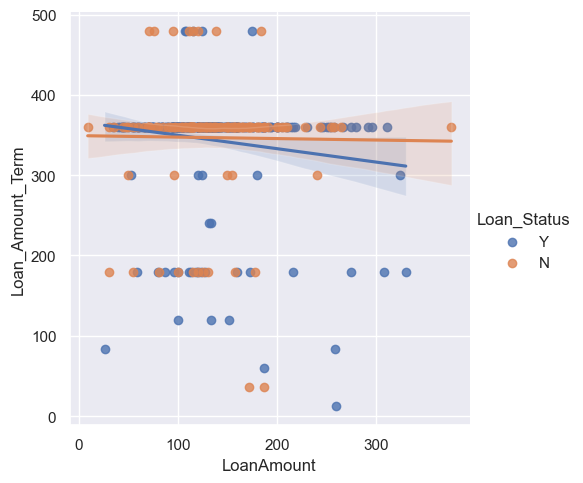

In [541]:
sns.lmplot(x="LoanAmount", y="Loan_Amount_Term", hue="Loan_Status", data=df)
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')
plt.show()

This does not give concrete Information

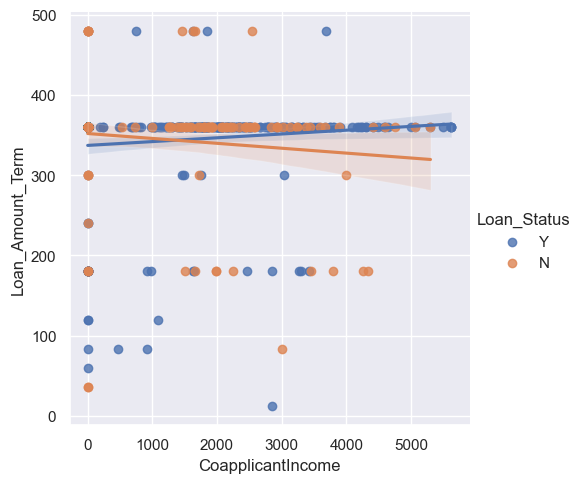

In [542]:
sns.lmplot(x="CoapplicantIncome", y="Loan_Amount_Term", hue="Loan_Status", data=df)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Loan_Amount_Term')
plt.show()

This does not give concrete Information

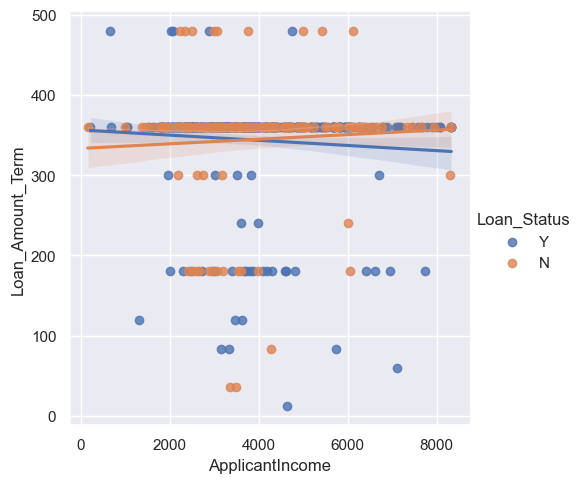

In [543]:
sns.lmplot(x="ApplicantIncome", y="Loan_Amount_Term", hue="Loan_Status", data=df)
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Amount_Term')
plt.show()

Higher Applicant Income and lower amount term tend to have more loan approvals.

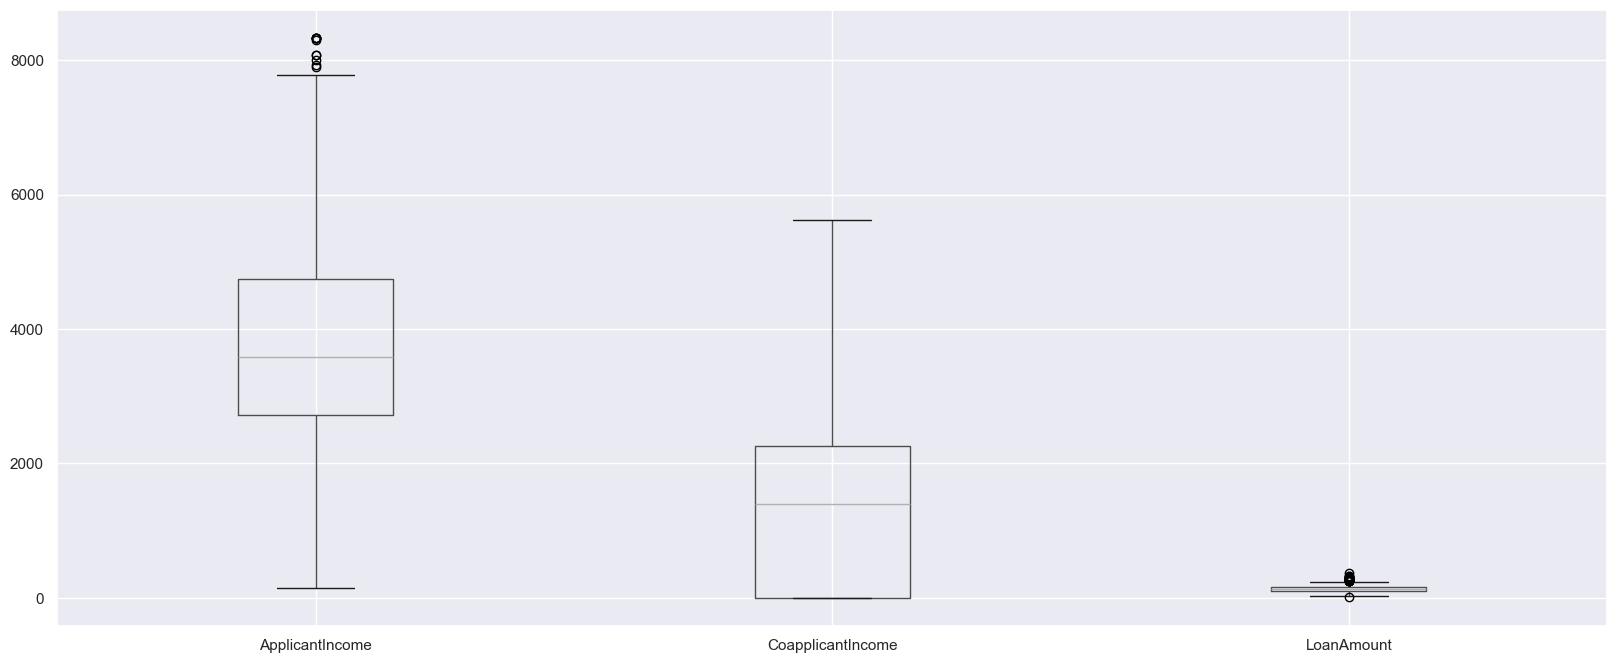

In [544]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].boxplot(return_type ='axes',figsize = (20,8))
plt.show()

Range of Loan amount is way lesser than applicant and co-applicant income ranges.

In [545]:
print("ApplicantIncome mean :",df.ApplicantIncome.mean())
print("CoapplicantIncome mean :",df.CoapplicantIncome.mean())
print("LoanAmount mean :",df.LoanAmount.mean())

ApplicantIncome mean : 3885.2318007662834
CoapplicantIncome mean : 1371.5803064916474
LoanAmount mean : 131.81112871064212


The mean value of the loan amount is way less than the applicants or coapplicants mean income.

In [546]:
#Lets try to divide the loan_term_data into categories and check if there is any relationship with loan status
UNIQUE_NULL_value_counts(df,'Loan_Amount_Term',True)

########################### Loan_Amount_Term ######################################################
Number of unique values in Loan_Amount_Term:  10


Number of null values in Loan_Amount_Term:  14


Description of the column 
Loan_Amount_Term:  count    508.000000
mean     343.937008
std       64.129522
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


Mean :  343.93700787401576


Median :  360.0


Mode :  360.0


Value_counts of Loan_Amount_Term: 
 Loan_Amount_Term
360.0    438
180.0     32
480.0     14
300.0     10
84.0       4
120.0      3
240.0      3
36.0       2
60.0       1
12.0       1
Name: count, dtype: int64




In [547]:
#Inspecting the data by dividing the loan amount term into 4 categories based on the range
bins_cnt = 4
print("Total number of unique values   "+str(len(data['Loan_Amount_Term'].value_counts(dropna=False)))+" of "+str(len(data))+"  records \n", data['Loan_Amount_Term'].value_counts(dropna=False,bins=bins_cnt))

KeyError: 'Loan_Amount_Term'

Above two graphs, clearly tell us that most prople applied for Loan amount term of over 250. Amost 83% of the applicants applient for loan amount term of 360 months.

Lets Look at the distribution of loan terms in terms of the loan approval status

In [ ]:
pd.crosstab(index=df["Loan_Amount_Term"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)
plt.show()

In [ ]:
#Showing the proportional comparison
stacked_data = pd.crosstab(index=df["Loan_Amount_Term"], columns=df["Loan_Status"]).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Loan_Status Breakdown based on Loan_Amount_Term")
plt.xlabel("Loan_Amount_Term")
plt.ylabel("Percentage Loan_Status (%)")
plt.show()

In [ ]:
sns.boxplot(x='Loan_Status',y='Loan_Amount_Term',data=df)
plt.show()

In [ ]:
pd.crosstab(df['Loan_Amount_Term'], df['Loan_Status'])

Since 83% of the data has 360 month loan term. Though  there is variation in loan acceptance based on number of Loan_term with respect to Loan status, due to uneven distribution of data and very few records for few categories, we cannot describe the trend. Chi square test results also showed that the Loan_Amount_term formed as 4 category variable has no affect on the Loan_status. The avergae loanterm is same irrespective of approval status.

Checking each variable and how it potentially could affect the Loan Aprroval status.

In [ ]:
categorical_var

In [ ]:
pd.crosstab(index=df["Self_Employed"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)
plt.show()

Even though self employed apply for higher loan amounts(from 7-c), Number of selfemployed applicants are less than other.

In [ ]:
#Showing the proportional comparison
stacked_data = pd.crosstab(index=df["Self_Employed"], columns=df["Loan_Status"]).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Loan_Status Breakdown based on Self_Employment")
plt.xlabel("Self_Employed")
plt.ylabel("Percentage Loan_Status (%)")
plt.show()

there seems to be no affect of self employment status on loan approvals.

In [ ]:
pd.crosstab(index=df["Married"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)
plt.show()

In [ ]:
#Showing the proportional comparison
stacked_data = pd.crosstab(index=df["Married"], columns=df["Loan_Status"]).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Loan_Status Breakdown based on Married")
plt.xlabel("Married")
plt.ylabel("Percentage Loan_Status (%)")
plt.show()

The number of married applicants are higher than unmarried applicants. The Loan approval seems to be almost similar for both the groups.




In [ ]:
pd.crosstab(index=df["Education"], columns=df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)
plt.show()

In [ ]:
#Showing the proportional comparison
stacked_data = pd.crosstab(index=df["Education"], columns=df["Loan_Status"]).apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Loan_Status Breakdown based on Education")
plt.xlabel("Education")
plt.ylabel("Percentage Loan_Status (%)")
plt.show()

The number of graduated applicants are higher. The Loan approval ratio seems to be almost similar for both the groups.

Applicant loan amount based on dependents

In [ ]:
df.columns

Analysis by grouping columns

In [ ]:
df_temp = df[['Married','Dependents','LoanAmount','CoapplicantIncome','ApplicantIncome']]
df_group = df_temp.groupby(['Married','Dependents'],as_index=False).mean()
df_group.pivot(index='Married',columns='Dependents')

Average Loan amount seems to increase with the number of dependents.
The Applicant mean income for people with more than 3 depenends is highest

In the category of  applicants who have more than 3 dependents, Married applicants tend to have 30% more mean income than unmarried applicants.

The coapplicant income is ingeneral higher for married people and the  co applicant income decreases with increasing number of dependents.

In [ ]:
df_temp = df[['Self_Employed','Education','LoanAmount','CoapplicantIncome','ApplicantIncome']]
df_group = df_temp.groupby(['Self_Employed','Education'],as_index=False).mean()
df_group.pivot(index='Self_Employed',columns='Education')

The mean applicant income is higher for self employed people and also among the self employed, the income is higher for graduates.

While the average co applicant income seems to be lower for  self-employed employees.

There are no strong patterns found in Loan amount.

In addition to the insights from the first seven questions, above mentioned are some of the Insights we got to know about the data as part of EDA.

## <font color=Blue>Fiting Basic Logistic model and got an accuracy of 79% 

This is a basic model, we might further want to normlise the data and try using some other complex models like XGBoost, Neural Networks if needed.

In [ ]:
#to fit the model, lets drop 
df.head(5)

In [ ]:
df.isnull().sum()

In [ ]:
df.Loan_Status.value_counts()

In [ ]:
data_1= df.copy() # Copy of the existing data with all the changes

In [ ]:
data_1.Loan_Status = data_1.Loan_Status.map(dict(Y=1, N=0))


In [ ]:
data_1["Loan_Amount_Term"] = data_1["Loan_Amount_Term"].fillna(data_1["Loan_Amount_Term"].median())

In [ ]:
data_1.dtypes

In [ ]:
logit_data = (data_1
       .pipe(lambda data_1: data_1.join(pd.get_dummies(data_1['Gender'].fillna(data_1["Gender"].mode()), prefix='Gender')))
       .pipe(lambda data_1: data_1.join(pd.get_dummies(data_1['Married'].fillna(data_1["Married"].mode()), prefix='Married')))       
       .pipe(lambda data_1: data_1.join(pd.get_dummies(data_1['Dependents'].fillna(data_1["Dependents"].mode()), prefix='Dependents'))) 
       .pipe(lambda data_1: data_1.join(pd.get_dummies(data_1['Education'].fillna(data_1["Education"].mode()), prefix='Education')))
       .pipe(lambda data_1: data_1.join(pd.get_dummies(data_1['Self_Employed'].fillna(data_1["Self_Employed"].mode()), prefix='Self_Employed'))) 
       .pipe(lambda data_1: data_1.join(pd.get_dummies(data_1['Credit_History'].fillna(data_1["Credit_History"].mode()), prefix='Credit_History')))
       .pipe(lambda data_1: data_1.join(pd.get_dummies(data_1['Property_Area'].fillna(data_1["Property_Area"].mode()), prefix='Property_Area')))        
       .drop([ 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'], axis='columns')
      )


In [ ]:
# Splitting the dataset between training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(logit_data.drop(axis=1,columns=['Loan_Status']), logit_data['Loan_Status'], test_size = 0.25)

In [ ]:
# Xtrain = logit_data.drop(axis=1,columns=['Loan_Status']) 
# ytrain = logit_data['Loan_Status']

In [ ]:
# Xtrain.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Handle missing values in training and test data
imputer = SimpleImputer(strategy='median')  # you can also use 'mean' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 2: Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)  # increase iterations for convergence
model.fit(X_train, y_train)

# Step 3: Make predictions
predicted_classes = model.predict(X_test)

# Step 4: Evaluate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
parameters = model.coef_

# Step 5: Print results
print("Model Accuracy:", accuracy)
print("Model Coefficients:", parameters)

In [ ]:
parameters

In [357]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.79      0.45      0.58        42
           1       0.80      0.95      0.87        95

    accuracy                           0.80       137
   macro avg       0.79      0.70      0.72       137
weighted avg       0.79      0.80      0.78       137



# <font color=black>9. Summary 

---

## Project Summary

### Data Overview
The dataset consists of **12 independent variables** — 4 numerical and 8 categorical — with **Loan_Status** as the target variable (categorical).  
Since the target variable represents approval or rejection, this is formulated as a **classification problem**.

---

### Data Challenges
The dataset contained **missing values** in several columns such as `LoanAmount`, `Loan_Amount_Term`, and `Credit_History`.  
These were treated using **median**, **mode**, and **KNN-based imputation**.  

Outliers were found in income and loan columns.  
Since these were technically valid, they were handled through **scaling and normalization** instead of removal.

---

### Key Observations
- Most quantitative variables were **right-skewed**.  
- **Graduates** earned more than **non-graduates**, and **self-employed graduates** earned the highest overall.  
- Self-employed applicants applied for **larger loans** but represented a **smaller share** of total applicants.

---

### Loan Approval Insights
- The most influential approval factors were **Credit History**, **Property Area**, and **Education Level**.  
- Quantitative features like income and loan amount did not directly affect approvals alone, but **their combinations did**.

---

### Correlation Insights
- **Applicant Income**, **Coapplicant Income**, and **LoanAmount** were moderately correlated.  
- Both income and loan amount followed a **log-normal distribution**, and applying **log transformations** improved stability.

---

### Next Steps
- Extend analysis with **Logistic Regression** and **Decision Tree** models.  
- Evaluate using **Accuracy**, **Precision**, **Recall**, and **F1-score**.  
- Deploy findings on a **Streamlit dashboard** for business visualization.

---


# <font color=black>References

1. https://www.abs.gov.au/websitedbs/a3121120.nsf/home/statistical+language+-+measures+of+central+tendency
2. https://statistics.laerd.com/statistical-guides/measures-of-spread-range-quartiles.ph
3. https://stackoverflow.com/questions/45045802/how-to-do-a-one-tail-pvalue-calculate-in-python
4. https://help.xlstat.com/s/article/which-statistical-test-should-you-use?language=en_US 
5. https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676